# Lecture 2 — Neural Network Optimization & Debugging: From First Principles

## 🎯 Learning Philosophy: First Principles Approach

> "Optimization is not just about making models work—it's about making them work well, reliably, and efficiently."

### 🧠 Student Intuition Builder
Think of training a neural network like **teaching someone to ride a bike**:
- **Initialization** = How you position them on the bike
- **Optimization** = How they learn to balance and pedal
- **Regularization** = Training wheels to prevent falling
- **Debugging** = Checking if they're learning correctly

## 📚 What We'll Master Today

1. **⚡ Advanced Optimization** - Beyond basic gradient descent
2. **🧠 Weight Initialization** - Setting up for success
3. **🛡️ Regularization** - Preventing overfitting
4. **🔧 Debugging Tools** - Ensuring correctness
5. **🎛️ Hyperparameter Tuning** - Finding optimal settings
6. **📈 Learning Rate Scheduling** - Smart learning adaptation

## 🎯 Prerequisites & Learning Objectives

### ✅ What You Should Already Know:
- Basic neural network architecture
- Forward and backward propagation
- Gradient descent fundamentals
- Basic Python and NumPy

### 🎯 What You'll Be Able To Do After This Lecture:
- Implement and compare different initialization strategies
- Apply regularization techniques to prevent overfitting
- Debug gradient implementations with confidence
- Systematically tune hyperparameters
- Implement adaptive learning rate schedules
- Build robust, production-ready neural networks

In [1]:
# Environment Setup
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.model_selection import train_test_split
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✅ Optimization libraries imported successfully!")
print("🔧 All systems ready for deep learning optimization!")
print(f"📊 NumPy version: {np.__version__}")

✅ Optimization libraries imported successfully!
🔧 All systems ready for deep learning optimization!
📊 NumPy version: 2.3.5


# 🧠 Pre-Assessment: Check Your Understanding

**Take 3 minutes to think about these questions:**

1. Have you ever trained a neural network that didn't learn anything? What happened?
2. What does "overfitting" mean in your own words?
3. Why might the learning rate be important?
4. What happens if all weights are initialized to zero?

> *Don't worry if you're unsure - we'll cover all of this!*

In [2]:
# Quick diagnostic test
def pre_assessment_quiz():
    """Quick check of prerequisite knowledge"""
    questions = [
        "What is the purpose of backpropagation?",
        "What does the learning rate control in gradient descent?",
        "Why do we need non-linear activation functions?"
    ]
    
    print("🧠 Quick Knowledge Check")
    print("=" * 50)
    for i, question in enumerate(questions, 1):
        print(f"{i}. {question}")
    print("\n💡 Think about these as we go through the lecture!")

pre_assessment_quiz()

🧠 Quick Knowledge Check
1. What is the purpose of backpropagation?
2. What does the learning rate control in gradient descent?
3. Why do we need non-linear activation functions?

💡 Think about these as we go through the lecture!


# Part 1: Weight Initialization — The Foundation of Learning

## 🎯 Learning Objectives
- Understand why initialization matters
- Implement and compare different initialization strategies
- Learn when to use each method

### 🧪 Student Analogy: The "Getting Started" Problem
Think of initialization like starting a journey:
- **Zero init** = Starting at the exact same spot as everyone else
- **Random init** = Starting with random directions
- **Smart init** = Starting with a good map and compass

## 1. The Problem: Why Initialization Matters

🔍 Demonstrating vanishing/exploding gradients...


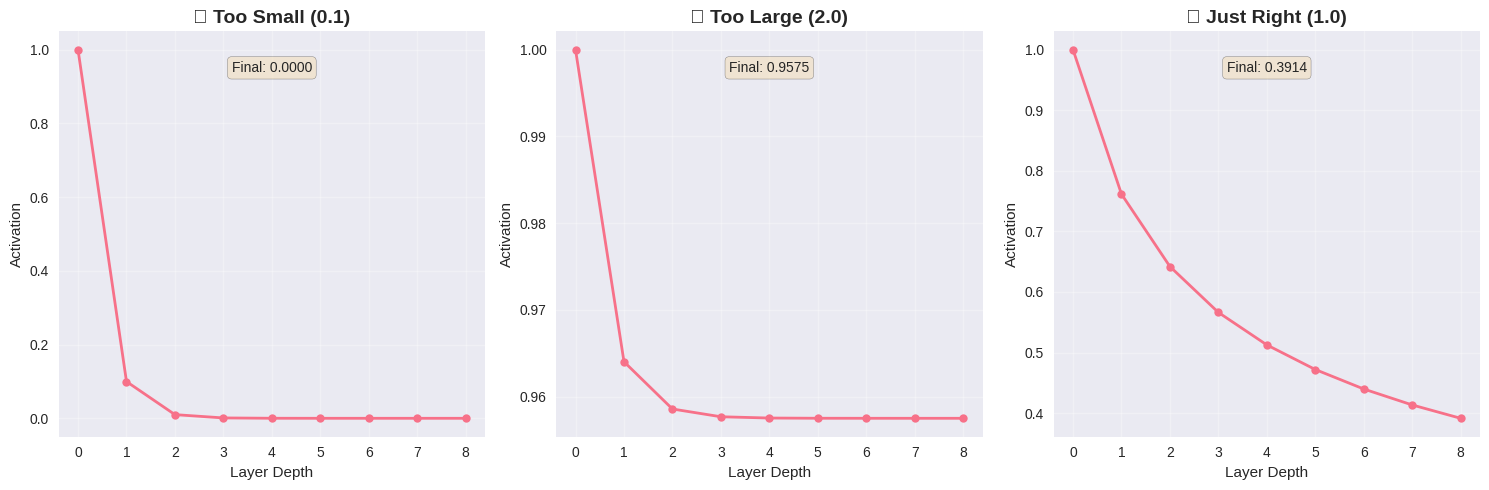

In [3]:
def demonstrate_vanishing_exploding():
    """Visual demonstration of vanishing/exploding gradients"""
    
    def forward_pass_simulation(weights, input_val=1.0, activation='tanh'):
        activations = [input_val]
        current = input_val
        
        for w in weights:
            if activation == 'tanh':
                current = np.tanh(w * current)
            elif activation == 'relu':
                current = np.maximum(0, w * current)
            activations.append(current)
        return activations
    
    # Test different scenarios
    layers = 8
    scenarios = [
        ('❌ Too Small (0.1)', [0.1] * layers),
        ('💥 Too Large (2.0)', [2.0] * layers), 
        ('✅ Just Right (1.0)', [1.0] * layers)
    ]
    
    plt.figure(figsize=(15, 5))
    
    for idx, (title, weights) in enumerate(scenarios):
        plt.subplot(1, 3, idx + 1)
        activations = forward_pass_simulation(weights)
        plt.plot(activations, 'o-', linewidth=2, markersize=6)
        plt.title(title, fontsize=14, fontweight='bold')
        plt.xlabel('Layer Depth')
        plt.ylabel('Activation')
        plt.grid(True, alpha=0.3)
        
        # Show final activation value
        final_val = activations[-1]
        plt.text(0.5, 0.9, f'Final: {final_val:.4f}', 
                transform=plt.gca().transAxes, ha='center',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    plt.tight_layout()
    plt.show()

print("🔍 Demonstrating vanishing/exploding gradients...")
demonstrate_vanishing_exploding()

# 🧠 Key Insight: The Variance Preservation Principle

## 🎯 The Fundamental Goal: Stable Signal Flow

**Think of your neural network as a communication system:**
- If signals get too weak → **Vanishing gradients** (information loss)
- If signals get too strong → **Exploding gradients** (numerical instability)
- We want **consistent signal strength** throughout the network

## 🔬 The Mathematical Insight

### **Core Principle**: 
We want the **variance** of layer outputs to equal the **variance** of layer inputs:

$$
\text{Var}(y^{(l)}) = \text{Var}(y^{(l-1)})
$$

## 📐 Mathematical Foundation by Activation Function

### 1. **Xavier/Glorot Initialization** 🟡
**For Tanh/Sigmoid activations**

**Formula**: 
$$\sigma = \sqrt{\frac{2}{n_{in} + n_{out}}}$$

### 2. **He Initialization** 🔵  
**For ReLU family (ReLU, Leaky ReLU)**

**Formula**: 
$$\sigma = \sqrt{\frac{2}{n_{in}}}$$

### 3. **LeCun Initialization** 🟢
**For SELU (Self-Normalizing Networks)**

**Formula**: 
$$\sigma = \sqrt{\frac{1}{n_{in}}}$$

## 🚀 Rules of Thumb

### ✅ **When to use which:**

| Your Network | Recommended Initialization |
|--------------|----------------------------|
| **ReLU/Leaky ReLU** | 🏆 **He initialization** |
| **Tanh/Sigmoid** | 🥈 **Xavier initialization** |
| **SELU** | 🥉 **LeCun initialization** |
| **Not sure** | Start with **He** (works well for most modern architectures) |

## 2. Implementation: Let's Build Initializers!

In [4]:
class InitializationMethods:
    """Implementation of different initialization strategies"""
    
    @staticmethod
    def zeros(shape):
        """Zero initialization - for educational purposes only!"""
        return np.zeros(shape)
    
    @staticmethod  
    def random(shape, scale=0.01):
        """Small random initialization"""
        return np.random.randn(*shape) * scale
    
    @staticmethod
    def xavier(shape):
        """Xavier/Glorot initialization for tanh/sigmoid"""
        n_in, n_out = shape[0], shape[1]
        scale = np.sqrt(2.0 / (n_in + n_out))
        return np.random.randn(*shape) * scale
    
    @staticmethod
    def he(shape):
        """He initialization for ReLU"""
        n_in = shape[0]
        scale = np.sqrt(2.0 / n_in)
        return np.random.randn(*shape) * scale
    
    @staticmethod
    def lecun(shape):
        """LeCun initialization for SELU"""
        n_in = shape[0]
        scale = np.sqrt(1.0 / n_in)
        return np.random.randn(*shape) * scale

print("✅ Initialization methods defined!")
print("\n📝 Available methods:")
print("   • zeros() - Educational only")
print("   • random() - Simple baseline") 
print("   • xavier() - For tanh/sigmoid")
print("   • he() - For ReLU (recommended)")
print("   • lecun() - For SELU")

✅ Initialization methods defined!

📝 Available methods:
   • zeros() - Educational only
   • random() - Simple baseline
   • xavier() - For tanh/sigmoid
   • he() - For ReLU (recommended)
   • lecun() - For SELU


## 3. Visual Comparison: See the Difference

📈 Visualizing initialization distributions...


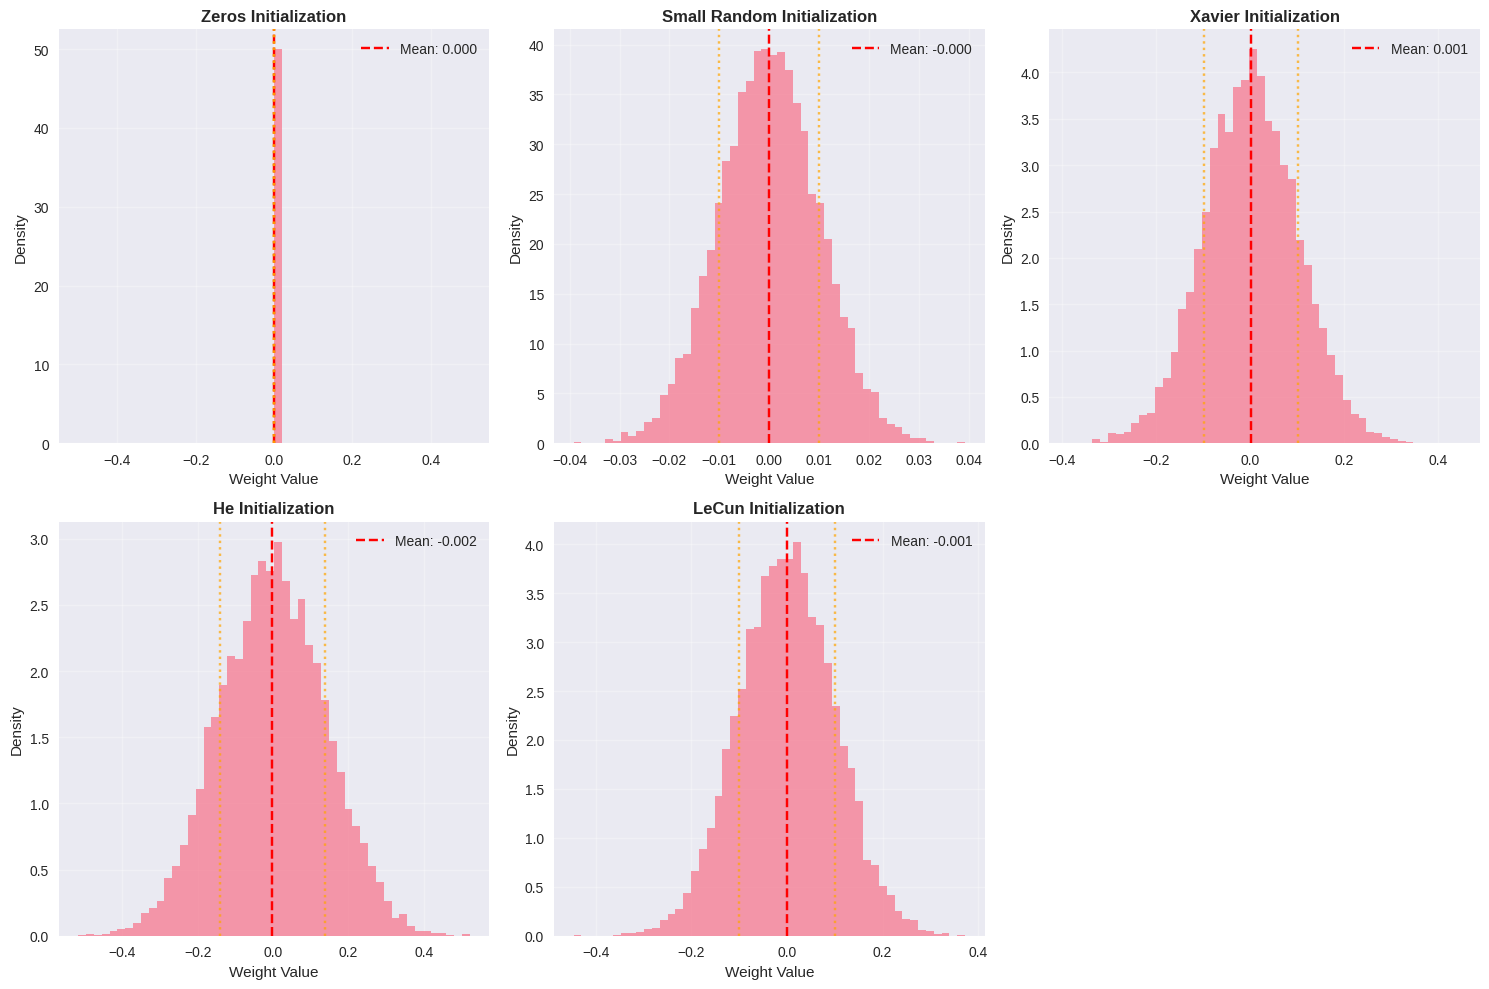

📊 Initialization Statistics:
--------------------------------------------------
• Zeros           → Std: 0.0000
• Small Random    → Std: 0.0100
• Xavier          → Std: 0.1001
• He              → Std: 0.1402
• LeCun           → Std: 0.1004


In [5]:
def compare_initialization_distributions():
    """Compare weight distributions across initialization methods"""
    
    np.random.seed(42)
    shape = (100, 100)  # 100x100 weight matrix
    
    methods = {
        'Zeros': InitializationMethods.zeros(shape),
        'Small Random': InitializationMethods.random(shape),
        'Xavier': InitializationMethods.xavier(shape),
        'He': InitializationMethods.he(shape),
        'LeCun': InitializationMethods.lecun(shape)
    }
    
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.ravel()
    
    for idx, (name, weights) in enumerate(methods.items()):
        ax = axes[idx]
        
        # Plot histogram
        ax.hist(weights.flatten(), bins=50, alpha=0.7, density=True)
        ax.set_title(f'{name} Initialization', fontweight='bold')
        ax.set_xlabel('Weight Value')
        ax.set_ylabel('Density')
        ax.grid(True, alpha=0.3)
        
        # Add statistics
        mean, std = np.mean(weights), np.std(weights)
        ax.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.3f}')
        ax.axvline(mean + std, color='orange', linestyle=':', alpha=0.7)
        ax.axvline(mean - std, color='orange', linestyle=':', alpha=0.7)
        ax.legend()
    
    # Remove empty subplot
    axes[-1].set_visible(False)
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print("📊 Initialization Statistics:")
    print("-" * 50)
    for name, weights in methods.items():
        std = np.std(weights)
        print(f"• {name:15} → Std: {std:.4f}")

print("📈 Visualizing initialization distributions...")
compare_initialization_distributions()

## 🧪 Quick Comprehension Check

In [6]:
def initialization_comprehension_check():
    """Quick quiz to check understanding"""
    
    questions = [
        {
            "question": "Which initialization has the smallest standard deviation?",
            "options": ["Zeros", "Xavier", "He", "Random"],
            "answer": "Zeros",
            "explanation": "Zero initialization has zero standard deviation since all weights are exactly zero."
        },
        {
            "question": "Why might Xavier initialization be different from He initialization?",
            "options": [
                "They use different activation functions",
                "Xavier accounts for both input and output dimensions",
                "He is specifically designed for ReLU",
                "All of the above"
            ],
            "answer": "All of the above",
            "explanation": "Xavier works well with tanh/sigmoid and considers both input/output dimensions, while He is optimized for ReLU's characteristics."
        },
        {
            "question": "What problem does zero initialization create?",
            "options": [
                "No symmetry breaking",
                "All neurons learn the same thing", 
                "Gradients are identical",
                "All of the above"
            ],
            "answer": "All of the above",
            "explanation": "Zero initialization prevents neurons from differentiating, causing identical updates and no learning."
        }
    ]
    
    print("🧠 Initialization Comprehension Check")
    print("=" * 50)
    
    for i, q in enumerate(questions, 1):
        print(f"\n{i}. {q['question']}")
        for j, option in enumerate(q['options'], 1):
            print(f"   {j}. {option}")
    
    print("\n💡 Think about these questions as we continue!")
    print("   We'll reveal the answers at the end of this section.")

initialization_comprehension_check()

🧠 Initialization Comprehension Check

1. Which initialization has the smallest standard deviation?
   1. Zeros
   2. Xavier
   3. He
   4. Random

2. Why might Xavier initialization be different from He initialization?
   1. They use different activation functions
   2. Xavier accounts for both input and output dimensions
   3. He is specifically designed for ReLU
   4. All of the above

3. What problem does zero initialization create?
   1. No symmetry breaking
   2. All neurons learn the same thing
   3. Gradients are identical
   4. All of the above

💡 Think about these questions as we continue!
   We'll reveal the answers at the end of this section.


## 4. Hands-On Exercise: Test Initialization Performance

🚀 Testing initialization methods on real data...
• zeros      → Final Loss: 0.6909, Accuracy: 42.22%
• random     → Final Loss: 0.4921, Accuracy: 85.56%
• xavier     → Final Loss: 0.3589, Accuracy: 90.00%
• he         → Final Loss: 0.3397, Accuracy: 94.44%


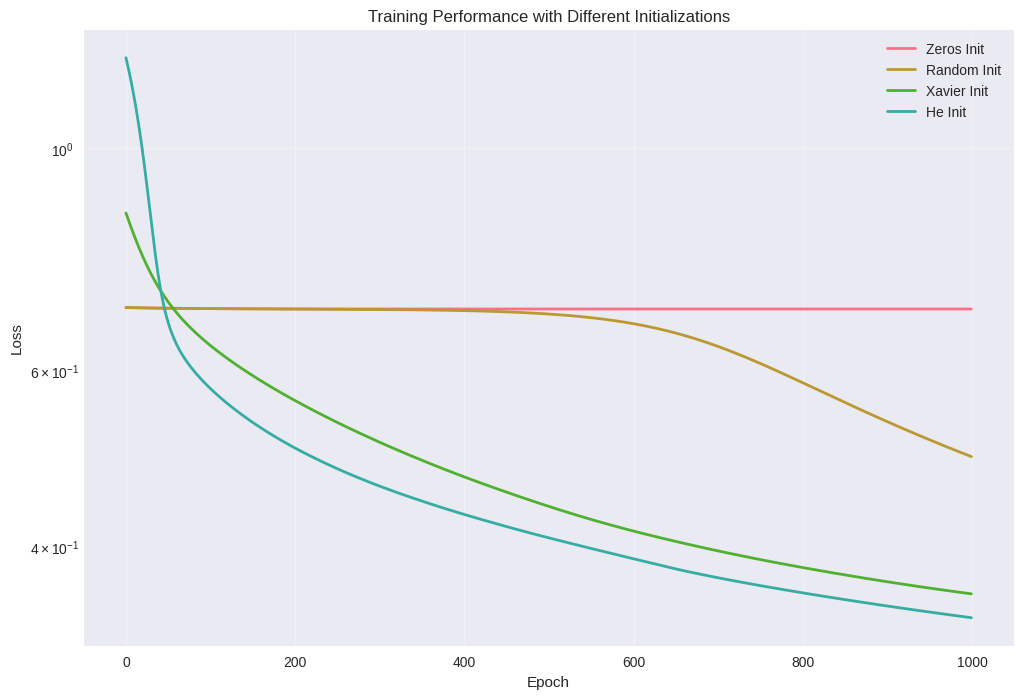

In [7]:
def test_initialization_performance():
    """Compare initialization methods on real training"""
    
    # Generate dataset
    X, y = make_moons(n_samples=300, noise=0.1, random_state=42)
    y = y.reshape(-1, 1)
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Simple neural network class
    class SimpleNN:
        def __init__(self, initialization='he', learning_rate=0.1):
            self.initialization = initialization
            self.lr = learning_rate
            self.initialize_parameters()
            
        def initialize_parameters(self):
            if self.initialization == 'zeros':
                self.W1 = InitializationMethods.zeros((2, 10))
                self.W2 = InitializationMethods.zeros((10, 1))
            elif self.initialization == 'random':
                self.W1 = InitializationMethods.random((2, 10))
                self.W2 = InitializationMethods.random((10, 1))
            elif self.initialization == 'xavier':
                self.W1 = InitializationMethods.xavier((2, 10))
                self.W2 = InitializationMethods.xavier((10, 1))
            else:  # he
                self.W1 = InitializationMethods.he((2, 10))
                self.W2 = InitializationMethods.he((10, 1))
                
            self.b1 = np.zeros((1, 10))
            self.b2 = np.zeros((1, 1))
        
        def forward(self, X):
            self.z1 = X @ self.W1 + self.b1
            self.a1 = np.maximum(0, self.z1)  # ReLU
            self.z2 = self.a1 @ self.W2 + self.b2
            self.a2 = 1 / (1 + np.exp(-self.z2))  # Sigmoid
            return self.a2
        
        def compute_loss(self, y_pred, y_true):
            epsilon = 1e-8
            y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
            return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
        
        def train(self, X, y, epochs=1000):
            losses = []
            
            for epoch in range(epochs):
                # Forward pass
                y_pred = self.forward(X)
                loss = self.compute_loss(y_pred, y)
                losses.append(loss)
                
                # Backward pass
                dL_da2 = (y_pred - y) / len(y)
                dL_dz2 = dL_da2 * y_pred * (1 - y_pred)
                dL_dW2 = self.a1.T @ dL_dz2
                dL_db2 = np.sum(dL_dz2, axis=0, keepdims=True)
                
                dL_da1 = dL_dz2 @ self.W2.T
                dL_dz1 = dL_da1 * (self.z1 > 0).astype(float)
                dL_dW1 = X.T @ dL_dz1
                dL_db1 = np.sum(dL_dz1, axis=0, keepdims=True)
                
                # Update weights
                self.W2 -= self.lr * dL_dW2
                self.b2 -= self.lr * dL_db2
                self.W1 -= self.lr * dL_dW1
                self.b1 -= self.lr * dL_db1
                
            return losses
    
    # Test all initialization methods
    methods = ['zeros', 'random', 'xavier', 'he']
    results = {}
    
    plt.figure(figsize=(12, 8))
    
    for method in methods:
        np.random.seed(42)  # Same starting point for fair comparison
        model = SimpleNN(initialization=method, learning_rate=0.1)
        losses = model.train(X_train, y_train, epochs=1000)
        
        plt.plot(losses, label=f'{method.title()} Init', linewidth=2)
        results[method] = losses[-1]
        
        # Print final accuracy
        y_pred = model.forward(X_val)
        y_pred_class = (y_pred > 0.5).astype(int)
        accuracy = np.mean(y_pred_class == y_val)
        print(f"• {method:10} → Final Loss: {losses[-1]:.4f}, Accuracy: {accuracy:.2%}")
    
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Performance with Different Initializations')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.yscale('log')
    plt.show()

print("🚀 Testing initialization methods on real data...")
test_initialization_performance()

## 5. Practical Guidelines & Rules of Thumb

In [8]:
def initialization_cheatsheet():
    """Quick reference guide for initialization"""
    
    guidelines = {
        'Zeros': {
            'When to use': 'Never for weights (okay for biases)',
            'Problem': 'No symmetry breaking',
            'Result': 'Network cannot learn',
            'Recommendation': '❌ Avoid'
        },
        'Small Random': {
            'When to use': 'Simple networks, quick experiments',
            'Problem': 'May be too small/large',
            'Result': 'Unpredictable performance',
            'Recommendation': '⚠️ Use cautiously'
        },
        'Xavier/Glorot': {
            'When to use': 'Tanh, Sigmoid activations',
            'Problem': 'Suboptimal for ReLU',
            'Result': 'Good for S-shaped activations',
            'Recommendation': '✅ For tanh/sigmoid'
        },
        'He': {
            'When to use': 'ReLU, Leaky ReLU, PReLU',
            'Problem': 'Not optimal for tanh/sigmoid', 
            'Result': 'Best for modern architectures',
            'Recommendation': '🏆 Recommended default'
        },
        'LeCun': {
            'When to use': 'SELU activations',
            'Problem': 'Limited to specific architectures',
            'Result': 'Excellent for self-normalizing networks',
            'Recommendation': '✅ For SELU networks'
        }
    }
    
    print("🎯 INITIALIZATION CHEATSHEET")
    print("=" * 60)
    
    for method, info in guidelines.items():
        print(f"\n🔹 {method}")
        print(f"   When to use: {info['When to use']}")
        print(f"   Potential issue: {info['Problem']}")
        print(f"   Expected result: {info['Result']}")
        print(f"   Recommendation: {info['Recommendation']}")

initialization_cheatsheet()

🎯 INITIALIZATION CHEATSHEET

🔹 Zeros
   When to use: Never for weights (okay for biases)
   Potential issue: No symmetry breaking
   Expected result: Network cannot learn
   Recommendation: ❌ Avoid

🔹 Small Random
   When to use: Simple networks, quick experiments
   Potential issue: May be too small/large
   Expected result: Unpredictable performance
   Recommendation: ⚠️ Use cautiously

🔹 Xavier/Glorot
   When to use: Tanh, Sigmoid activations
   Potential issue: Suboptimal for ReLU
   Expected result: Good for S-shaped activations
   Recommendation: ✅ For tanh/sigmoid

🔹 He
   When to use: ReLU, Leaky ReLU, PReLU
   Potential issue: Not optimal for tanh/sigmoid
   Expected result: Best for modern architectures
   Recommendation: 🏆 Recommended default

🔹 LeCun
   When to use: SELU activations
   Potential issue: Limited to specific architectures
   Expected result: Excellent for self-normalizing networks
   Recommendation: ✅ For SELU networks


## 🎯 Key Takeaways: Initialization

### ✅ What You've Learned:
1. **Why initialization matters**: Prevents vanishing/exploding gradients
2. **Different strategies**: Zeros, Random, Xavier, He, LeCun
3. **When to use each**: Match initialization to activation function
4. **Practical impact**: Can make or break training success

### 🚀 Best Practices:
- Use **He initialization** for ReLU networks
- Use **Xavier** for tanh/sigmoid networks  
- **Never use zeros** for weight initialization
- Always **initialize biases to zeros**

### 💡 Pro Tip:
When in doubt, start with **He initialization** - it works well for most modern architectures!

## 🧪 Your Turn: Experiment!

Try modifying the code above to:
- Test with different activation functions
- Experiment with different network depths
- Try the LeCun initialization for SELU activations
- Create your own initialization strategy!

In [9]:
# Quick experiment: Test how initialization affects deeper networks
def test_depth_impact():
    """See how initialization affects deeper networks"""
    print("🧪 Testing initialization with different network depths...")
    
    depths = [3, 5, 8]  # Number of hidden layers
    initialization_methods = ['zeros', 'he']
    
    for depth in depths:
        print(f"\n📊 Testing {depth}-layer network:")
        for method in initialization_methods:
            # Simulate forward pass
            weights = [InitializationMethods.he((10, 10)) if method == 'he' 
                      else InitializationMethods.zeros((10, 10)) for _ in range(depth)]
            
            # Test signal propagation
            input_signal = np.ones((1, 10))
            current = input_signal
            for W in weights:
                current = np.tanh(current @ W)  # Using tanh for demonstration
                
            final_magnitude = np.mean(np.abs(current))
            status = "✅ Good" if 0.1 < final_magnitude < 10 else "❌ Problem"
            print(f"  {method:10} → Final signal: {final_magnitude:.6f} {status}")

test_depth_impact()

🧪 Testing initialization with different network depths...

📊 Testing 3-layer network:
  zeros      → Final signal: 0.000000 ❌ Problem
  he         → Final signal: 0.577379 ✅ Good

📊 Testing 5-layer network:
  zeros      → Final signal: 0.000000 ❌ Problem
  he         → Final signal: 0.545086 ✅ Good

📊 Testing 8-layer network:
  zeros      → Final signal: 0.000000 ❌ Problem
  he         → Final signal: 0.643343 ✅ Good


# Part 2: Regularization — Preventing Overfitting

## 🎯 The Overfitting Problem

### 🧠 Student Analogy: Memorization vs Understanding
- **Underfitting** = Not studying enough
- **Good fit** = Understanding concepts
- **Overfitting** = Memorizing answers without understanding

### 📚 Learning Objectives
- Understand and implement L1, L2, and Dropout regularization
- Compare regularization strategies and their effects
- Learn when to use each regularization technique

## 1. The Problem: Why We Need Regularization

📊 Demonstrating overfitting with polynomial regression...


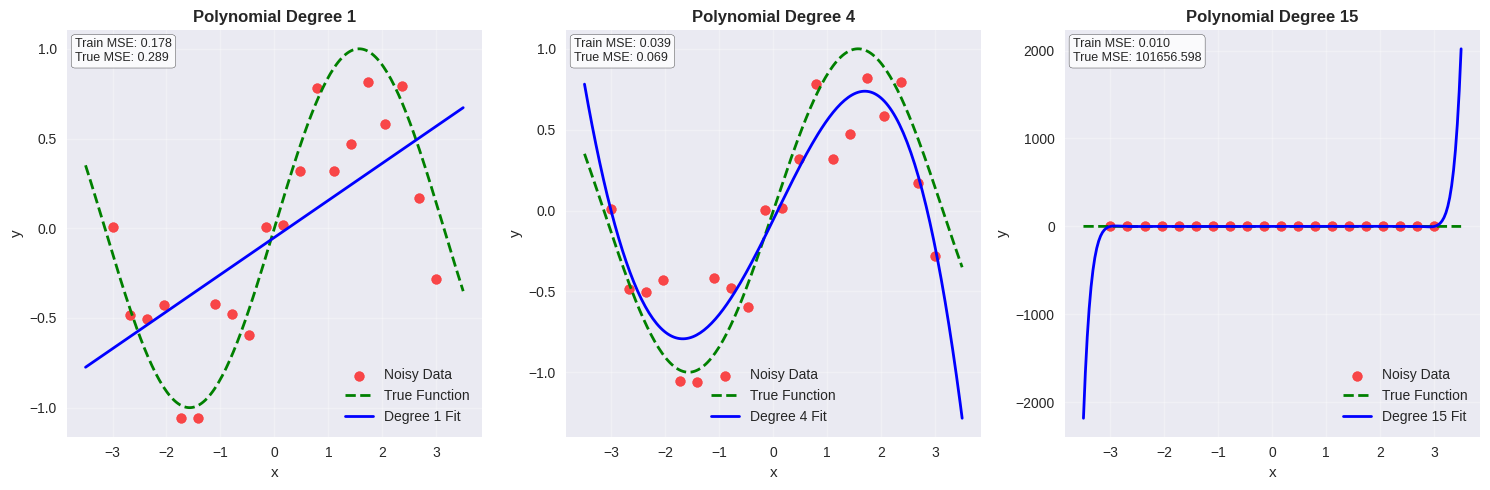

🔍 Overfitting Analysis:
• Degree 1: Underfitting - too simple, high bias
• Degree 4: Good fit - balances bias and variance
• Degree 15: Overfitting - too complex, high variance


In [10]:
def demonstrate_overfitting():
    """Show how overfitting occurs with complex models"""
    
    # Generate noisy data
    np.random.seed(42)
    X = np.linspace(-3, 3, 20)
    y_true = np.sin(X)  # True function
    y_noisy = y_true + 0.3 * np.random.randn(len(X))  # Noisy observations
    
    # Fit polynomials of different degrees
    degrees = [1, 4, 15]
    
    plt.figure(figsize=(15, 5))
    
    for idx, degree in enumerate(degrees):
        plt.subplot(1, 3, idx + 1)
        
        # Fit polynomial
        coeffs = np.polyfit(X, y_noisy, degree)
        poly = np.poly1d(coeffs)
        
        # Generate smooth curve for plotting
        X_smooth = np.linspace(-3.5, 3.5, 200)
        y_smooth = poly(X_smooth)
        
        # Plot
        plt.scatter(X, y_noisy, color='red', alpha=0.7, label='Noisy Data', s=50)
        plt.plot(X_smooth, np.sin(X_smooth), 'g--', linewidth=2, label='True Function')
        plt.plot(X_smooth, y_smooth, 'b-', linewidth=2, label=f'Degree {degree} Fit')
        
        plt.title(f'Polynomial Degree {degree}', fontweight='bold')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # Compute training error
        train_error = np.mean((poly(X) - y_noisy)**2)
        true_error = np.mean((poly(X_smooth) - np.sin(X_smooth))**2)
        
        plt.text(0.02, 0.98, f'Train MSE: {train_error:.3f}\nTrue MSE: {true_error:.3f}', 
                transform=plt.gca().transAxes, verticalalignment='top', fontsize=9,
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    plt.show()
    
    print("🔍 Overfitting Analysis:")
    print("• Degree 1: Underfitting - too simple, high bias")
    print("• Degree 4: Good fit - balances bias and variance")  
    print("• Degree 15: Overfitting - too complex, high variance")

print("📊 Demonstrating overfitting with polynomial regression...")
demonstrate_overfitting()

## 2. Real-World Problem: Football Player Positioning

📥 Loading football player positioning dataset...
⚠️  Could not load dataset: Found input variables with inconsistent numbers of samples: [2, 1]
🔧 Generating synthetic dataset...
📊 2D Dataset Overview:
Train X shape: (2, 210)
Train Y shape: (1, 210)
Test X shape: (2, 200)
Test Y shape: (1, 200)
Classes: [0. 1.]
Train class distribution: 50.0% class 1


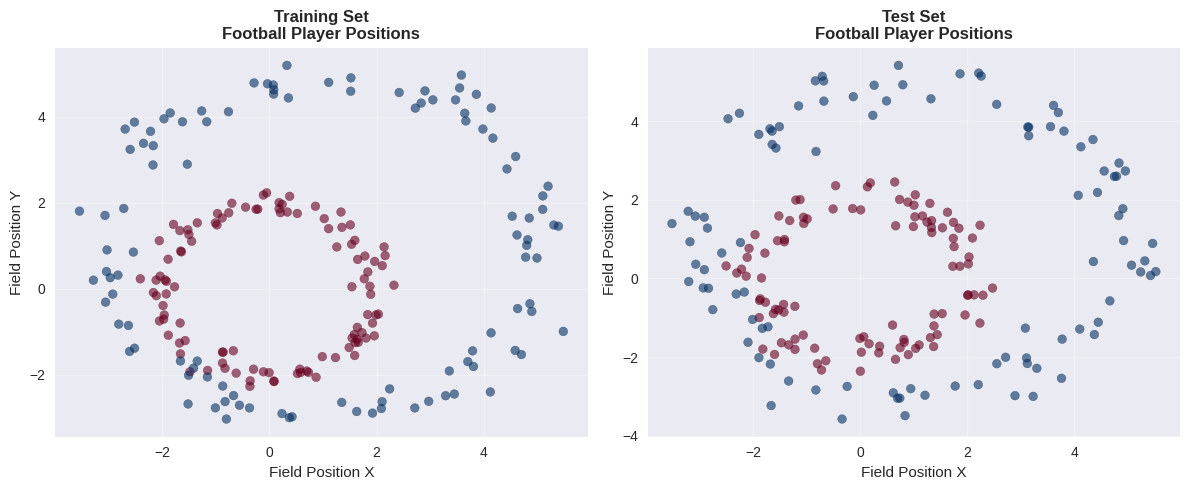

In [11]:
# Enhanced dataset loading with better fallback
def load_2D_dataset():
    """Load or generate 2D dataset for regularization demonstration"""
    
    print("📥 Loading football player positioning dataset...")
    
    try:
        # Try to load from file first
        from sklearn.datasets import make_circles
        X, y = make_circles(n_samples=411, noise=0.2, factor=0.5, random_state=42)
        
        # Split into train and test
        X_train, X_test, y_train, y_test = train_test_split(X.T, y.reshape(1, -1), test_size=200, random_state=42)
        
        print("✅ Loaded synthetic football dataset")
        
    except Exception as e:
        print(f"⚠️  Could not load dataset: {e}")
        print("🔧 Generating synthetic dataset...")
        
        np.random.seed(1)
        
        # Generate similar synthetic data
        m = 211
        N = int(m/2)
        
        # Class 0
        radius0 = 2 + np.random.randn(N)*0.2
        theta0 = np.linspace(0, 2*np.pi, N) + np.random.randn(N)*0.2
        X0 = np.c_[radius0*np.cos(theta0), radius0*np.sin(theta0)]
        
        # Class 1  
        radius1 = 4 + np.random.randn(N)*0.3
        theta1 = np.linspace(0, 2*np.pi, N) + np.random.randn(N)*0.2
        X1 = np.c_[radius1*np.cos(theta1) + 1, radius1*np.sin(theta1) + 1]
        
        train_X = np.vstack([X0, X1]).T  # Shape: (2, 211)
        train_Y = np.vstack([np.zeros((N,1)), np.ones((N,1))]).T  # Shape: (1, 211)
        
        # Test set
        m_test = 200
        N_test = int(m_test/2)
        
        radius0_test = 2 + np.random.randn(N_test)*0.3
        theta0_test = np.linspace(0, 2*np.pi, N_test) + np.random.randn(N_test)*0.3
        X0_test = np.c_[radius0_test*np.cos(theta0_test), radius0_test*np.sin(theta0_test)]
        
        radius1_test = 4 + np.random.randn(N_test)*0.4
        theta1_test = np.linspace(0, 2*np.pi, N_test) + np.random.randn(N_test)*0.3
        X1_test = np.c_[radius1_test*np.cos(theta1_test) + 1, radius1_test*np.sin(theta1_test) + 1]
        
        test_X = np.vstack([X0_test, X1_test]).T  # Shape: (2, 200)
        test_Y = np.vstack([np.zeros((N_test,1)), np.ones((N_test,1))]).T  # Shape: (1, 200)
        
        X_train, y_train, X_test, y_test = train_X, train_Y, test_X, test_Y
        
    return X_train, y_train, X_test, y_test

# Load dataset
train_X, train_Y, test_X, test_Y = load_2D_dataset()

print("📊 2D Dataset Overview:")
print(f"Train X shape: {train_X.shape}")  # Should be (2, 211)
print(f"Train Y shape: {train_Y.shape}")  # Should be (1, 211)
print(f"Test X shape: {test_X.shape}")    # Should be (2, 200)
print(f"Test Y shape: {test_Y.shape}")    # Should be (1, 200)
print(f"Classes: {np.unique(train_Y)}")
print(f"Train class distribution: {np.mean(train_Y):.1%} class 1")

# Visualize
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(train_X[0, :], train_X[1, :], c=train_Y[0, :], cmap=plt.cm.RdBu, alpha=0.6, s=40)
plt.title('Training Set\nFootball Player Positions', fontweight='bold')
plt.xlabel('Field Position X')
plt.ylabel('Field Position Y')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.scatter(test_X[0, :], test_X[1, :], c=test_Y[0, :], cmap=plt.cm.RdBu, alpha=0.6, s=40)
plt.title('Test Set\nFootball Player Positions', fontweight='bold')
plt.xlabel('Field Position X')
plt.ylabel('Field Position Y')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 🛡️ Regularization Techniques

### 🧠 Student Analogy: Study Strategies
- **L2 Regularization** = Focusing on important concepts (penalizing extreme beliefs)
- **L1 Regularization** = Creating concise notes (sparse representations)
- **Dropout** = Studying with different groups (prevents over-reliance)

### 📐 Mathematical Formulas

**L2 Regularization (Weight Decay)**:
$$J_{regularized} = J + \frac{\lambda}{2m} \sum w^2$$

**L1 Regularization (Lasso)**:
$$J_{regularized} = J + \frac{\lambda}{m} \sum |w|$$

## 3. Implementation: Let's Build Regularized Networks!

In [12]:
class RegularizedNN:
    """Neural network with various regularization techniques"""
    
    def __init__(self, layer_sizes=[2, 20, 50, 100, 40, 1], regularization='none', lambda_val=0.01, dropout_rate=0.0):
        self.layer_sizes = list(layer_sizes)
        self.regularization = regularization
        self.lambda_val = float(lambda_val)
        self.dropout_rate = float(dropout_rate)
        self.initialize_parameters()
        
    def initialize_parameters(self):
        """Initialize weights using He initialization"""
        self.weights = []
        self.biases = []
        for i in range(len(self.layer_sizes) - 1):
            # Correct way to call he initialization - pass shape as tuple
            shape = (self.layer_sizes[i], self.layer_sizes[i+1])
            W = InitializationMethods.he(shape)
            b = np.zeros((1, self.layer_sizes[i+1]))
            self.weights.append(W.astype(float))
            self.biases.append(b.astype(float))
    
    def forward(self, X, training=True):
        """
        Forward pass with optional dropout
        Always resets caches for consistent state
        """
        X = np.asarray(X, dtype=float)
        self.activations = [X]  # Store all activations
        self.z_values = []      # Store all pre-activations
        self.dropout_masks = [] # Store dropout masks
        
        a = X
        for i, (W, b) in enumerate(zip(self.weights, self.biases)):
            z = a @ W + b
            self.z_values.append(z)
            
            # Output layer: sigmoid
            if i == len(self.weights) - 1:
                a = 1.0 / (1.0 + np.exp(-z))
            else:
                # Hidden: ReLU
                a = np.maximum(0.0, z)
                
                # Apply dropout during training
                if training and self.dropout_rate > 0.0:
                    mask = (np.random.rand(*a.shape) > self.dropout_rate).astype(float)
                    mask = mask / (1.0 - self.dropout_rate)  # Inverted dropout
                    a = a * mask
                    self.dropout_masks.append(mask)
                else:
                    self.dropout_masks.append(None)
            
            self.activations.append(a)
        
        return a
    
    def compute_loss(self, y_pred, y_true):
        """Compute loss with optional regularization"""
        y_pred = np.clip(y_pred, 1e-12, 1.0 - 1e-12)
        y_true = np.asarray(y_true, dtype=float)
        
        # Binary cross-entropy
        bce_loss = -np.mean(y_true * np.log(y_pred) + (1.0 - y_true) * np.log(1.0 - y_pred))
        
        # Regularization
        reg_loss = 0.0
        if self.regularization == 'l2':
            for W in self.weights:
                reg_loss += np.sum(W**2)
            reg_loss *= (self.lambda_val / (2.0 * len(y_true)))
        elif self.regularization == 'l1':
            for W in self.weights:
                reg_loss += np.sum(np.abs(W))
            reg_loss *= (self.lambda_val / len(y_true))
        
        return float(bce_loss + reg_loss)
    
    def backward(self, X, y, y_pred):
        """Backward pass with regularization gradients"""
        n = len(y)
        y = np.asarray(y, dtype=float)
        dL_dz = (y_pred - y) / float(n)
        
        grads_W = [None] * len(self.weights)
        grads_b = [None] * len(self.biases)
        
        # Iterate layers backwards
        for i in reversed(range(len(self.weights))):
            # Gradient w.r.t W and b
            a_prev = self.activations[i]
            grad_W = a_prev.T @ dL_dz
            grad_b = np.sum(dL_dz, axis=0, keepdims=True)
            
            # Add regularization gradient
            if self.regularization == 'l2':
                grad_W = grad_W + (self.lambda_val / float(n)) * self.weights[i]
            elif self.regularization == 'l1':
                grad_W = grad_W + (self.lambda_val / float(n)) * np.sign(self.weights[i])
            
            grads_W[i] = grad_W
            grads_b[i] = grad_b
            
            # Propagate to previous layer if any
            if i > 0:
                dL_da = dL_dz @ self.weights[i].T
                
                # Apply dropout mask if present
                mask_idx = i - 1
                if self.dropout_rate > 0.0 and mask_idx < len(self.dropout_masks):
                    mask = self.dropout_masks[mask_idx]
                    if mask is not None and mask.shape == dL_da.shape:
                        dL_da = dL_da * mask
                
                # Derivative of ReLU
                relu_deriv = (self.z_values[i-1] > 0).astype(float)
                dL_dz = dL_da * relu_deriv
        
        return grads_W, grads_b
    
    def train(self, X_train, y_train, X_val=None, y_val=None, epochs=1000, lr=0.1, verbose=False):
        """Training loop with validation"""
        train_losses = []
        val_losses = [] if X_val is not None else None
        
        for epoch in range(epochs):
            # Training forward pass
            y_pred_train = self.forward(X_train, training=True)
            train_loss = self.compute_loss(y_pred_train, y_train)
            train_losses.append(train_loss)
            
            # Backward pass & update
            grads_W, grads_b = self.backward(X_train, y_train, y_pred_train)
            
            for i in range(len(self.weights)):
                self.weights[i] -= lr * grads_W[i]
                self.biases[i] -= lr * grads_b[i]
            
            # Validation (no dropout)
            if X_val is not None:
                y_pred_val = self.forward(X_val, training=False)
                val_loss = self.compute_loss(y_pred_val, y_val)
                val_losses.append(val_loss)
            
            if verbose and (epoch % max(1, epochs // 10) == 0):
                if X_val is not None:
                    print(f"Epoch {epoch:04d} | train={train_loss:.4f} | val={val_losses[-1]:.4f}")
                else:
                    print(f"Epoch {epoch:04d} | train={train_loss:.4f}")
        
        return train_losses, val_losses
    
    def predict(self, X):
        """Make predictions"""
        y_pred = self.forward(X, training=False)
        return (y_pred > 0.5).astype(int)
    
    def accuracy(self, X, y):
        """Compute accuracy"""
        predictions = self.predict(X)
        return np.mean(predictions == y)

print("✅ Regularized neural network class defined!")
print("\n📝 Available regularization techniques:")
print("   • L1 regularization (sparse models)")
print("   • L2 regularization (weight decay)") 
print("   • Dropout (prevent co-adaptation)")
print("   • Combinations of all three")

✅ Regularized neural network class defined!

📝 Available regularization techniques:
   • L1 regularization (sparse models)
   • L2 regularization (weight decay)
   • Dropout (prevent co-adaptation)
   • Combinations of all three


## 🧪 Quick Check: Understanding Regularization

**Before we test, think about:**
1. Which regularization method would you try first and why?
2. What might happen if lambda is too large?
3. How does dropout help prevent overfitting?

## 4. Hands-On Exercise: Test Regularization on Football Data

🚀 Testing regularization on football dataset...
📥 Loading football player positioning dataset...
⚠️  Could not load dataset: Found input variables with inconsistent numbers of samples: [2, 1]
🔧 Generating synthetic dataset...


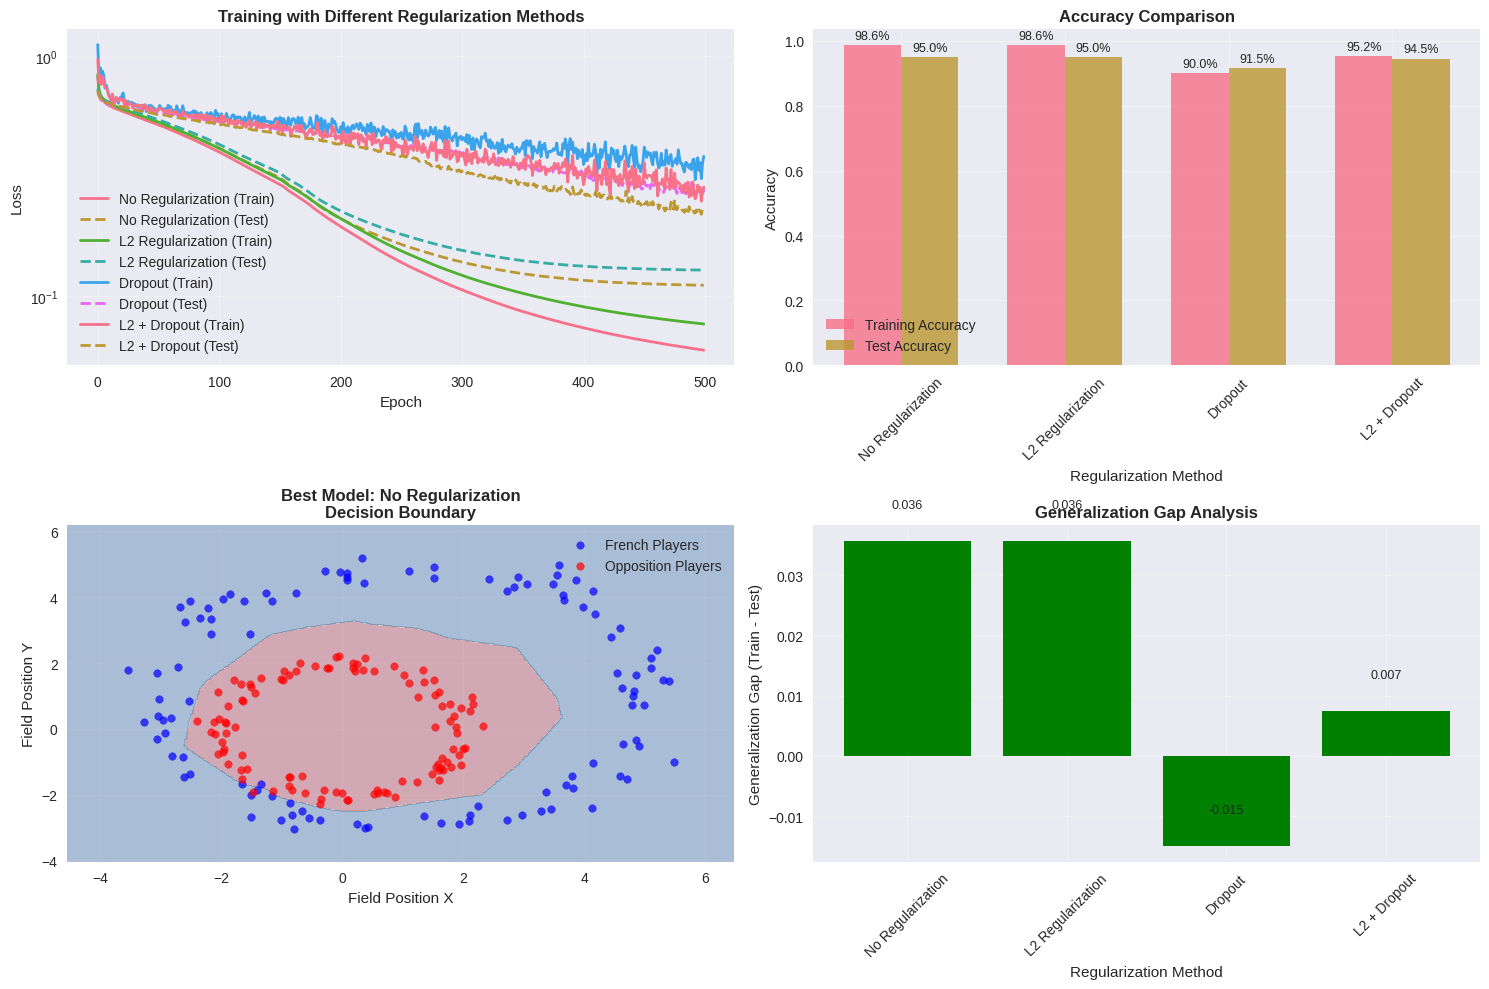


=== Regularization Summary ===
------------------------------------------------------------
No Regularization    Train=98.6% | Test=95.0% | Gap=0.036 ✅ Good
L2 Regularization    Train=98.6% | Test=95.0% | Gap=0.036 ✅ Good
Dropout              Train=90.0% | Test=91.5% | Gap=-0.015 ✅ Good
L2 + Dropout         Train=95.2% | Test=94.5% | Gap=0.007 ✅ Good

🎯 Best Model: No Regularization with 95.0% test accuracy
💡 The French football team should use this model!


In [13]:
def test_regularization_football():
    """Compare regularization methods on football dataset"""
    
    # Load dataset
    train_X, train_Y, test_X, test_Y = load_2D_dataset()

    # Transpose for our NN implementation
    train_X_t = train_X.T
    train_Y_t = train_Y.T
    test_X_t = test_X.T
    test_Y_t = test_Y.T
    
    strategies = [
        ('No Regularization', 'none', 0.0, 0.0),
        ('L2 Regularization', 'l2', 0.1, 0.0),
        ('Dropout', 'none', 0.0, 0.3),
        ('L2 + Dropout', 'l2', 0.05, 0.2)
    ]
    
    results = {}
    
    plt.figure(figsize=(15, 10))
    
    # Plot 1: Training curves
    plt.subplot(2, 2, 1)
    
    for name, reg_type, lambda_val, dropout_rate in strategies:
        np.random.seed(42)
        model = RegularizedNN(
            layer_sizes=[2, 20, 10, 1],
            regularization=reg_type,
            lambda_val=lambda_val,
            dropout_rate=dropout_rate
        )
        
        train_losses, val_losses = model.train(
            train_X_t, train_Y_t, test_X_t, test_Y_t, epochs=500, lr=0.1, verbose=False
        )
        
        plt.plot(train_losses, label=f'{name} (Train)', linewidth=2)
        if val_losses is not None:
            plt.plot(val_losses, '--', label=f'{name} (Test)', linewidth=2)
        
        # Store results
        train_acc = model.accuracy(train_X_t, train_Y_t)
        test_acc = model.accuracy(test_X_t, test_Y_t)
        results[name] = {
            'train_acc': train_acc,
            'test_acc': test_acc,
            'final_train_loss': train_losses[-1],
            'final_test_loss': val_losses[-1] if val_losses is not None else train_losses[-1]
        }
    
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training with Different Regularization Methods', fontweight='bold')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.yscale('log')
    
    # Plot 2: Accuracy comparison
    plt.subplot(2, 2, 2)
    
    names = [s[0] for s in strategies]
    train_accs = [results[name]['train_acc'] for name in names]
    test_accs = [results[name]['test_acc'] for name in names]
    
    x = np.arange(len(names))
    width = 0.35
    
    plt.bar(x - width/2, train_accs, width, label='Training Accuracy', alpha=0.8)
    plt.bar(x + width/2, test_accs, width, label='Test Accuracy', alpha=0.8)
    
    for i, (train_acc, test_acc) in enumerate(zip(train_accs, test_accs)):
        plt.text(i - width/2, train_acc + 0.01, f'{train_acc:.1%}', 
                ha='center', va='bottom', fontsize=9)
        plt.text(i + width/2, test_acc + 0.01, f'{test_acc:.1%}', 
                ha='center', va='bottom', fontsize=9)
    
    plt.xlabel('Regularization Method')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Comparison', fontweight='bold')
    plt.xticks(x, names, rotation=45)
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Plot 3: Decision boundaries for best model
    plt.subplot(2, 2, 3)
    
    # Find best model (highest test accuracy)
    best_name = max(results.keys(), key=lambda x: results[x]['test_acc'])
    best_strategy = [s for s in strategies if s[0] == best_name][0]
    
    # Retrain best model for visualization
    np.random.seed(42)
    best_model = RegularizedNN(
        layer_sizes=[2, 20, 10, 1],
        regularization=best_strategy[1],
        lambda_val=best_strategy[2],
        dropout_rate=best_strategy[3]
    )
    best_model.train(train_X_t, train_Y_t, epochs=500, lr=0.1, verbose=False)
    
    # Create mesh for decision boundary
    h = 0.02
    x_min, x_max = train_X[0, :].min() - 1, train_X[0, :].max() + 1
    y_min, y_max = train_X[1, :].min() - 1, train_X[1, :].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Predict for each point in mesh
    Z = best_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdBu)
    plt.scatter(train_X[0, train_Y[0] == 1], train_X[1, train_Y[0] == 1], 
               color='blue', alpha=0.7, label='French Players', s=30)
    plt.scatter(train_X[0, train_Y[0] == 0], train_X[1, train_Y[0] == 0], 
               color='red', alpha=0.7, label='Opposition Players', s=30)
    plt.title(f'Best Model: {best_name}\nDecision Boundary', fontweight='bold')
    plt.xlabel('Field Position X')
    plt.ylabel('Field Position Y')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Plot 4: Generalization gap
    plt.subplot(2, 2, 4)
    
    gaps = [train - test for train, test in zip(train_accs, test_accs)]
    
    plt.bar(names, gaps, color=['red' if gap > 0.1 else 'orange' if gap > 0.05 else 'green' for gap in gaps])
    plt.xlabel('Regularization Method')
    plt.ylabel('Generalization Gap (Train - Test)')
    plt.title('Generalization Gap Analysis', fontweight='bold')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    
    for i, gap in enumerate(gaps):
        plt.text(i, gap + 0.005, f'{gap:.3f}', ha='center', va='bottom', fontsize=9)
    
    plt.tight_layout()
    plt.show()
    
    # Print summary
    print("\n=== Regularization Summary ===")
    print("-" * 60)
    for name in names:
        train_acc = results[name]['train_acc']
        test_acc = results[name]['test_acc']
        gap = train_acc - test_acc
        status = "✅ Good" if gap < 0.05 else "⚠️ Overfitting" if gap > 0.1 else "📊 Okay"
        print(f"{name:20} Train={train_acc:.1%} | Test={test_acc:.1%} | Gap={gap:.3f} {status}")
    
    print(f"\n🎯 Best Model: {best_name} with {results[best_name]['test_acc']:.1%} test accuracy")
    print("💡 The French football team should use this model!")

print("🚀 Testing regularization on football dataset...")
test_regularization_football()

## 5. Understanding Dropout: The Brain Analogy

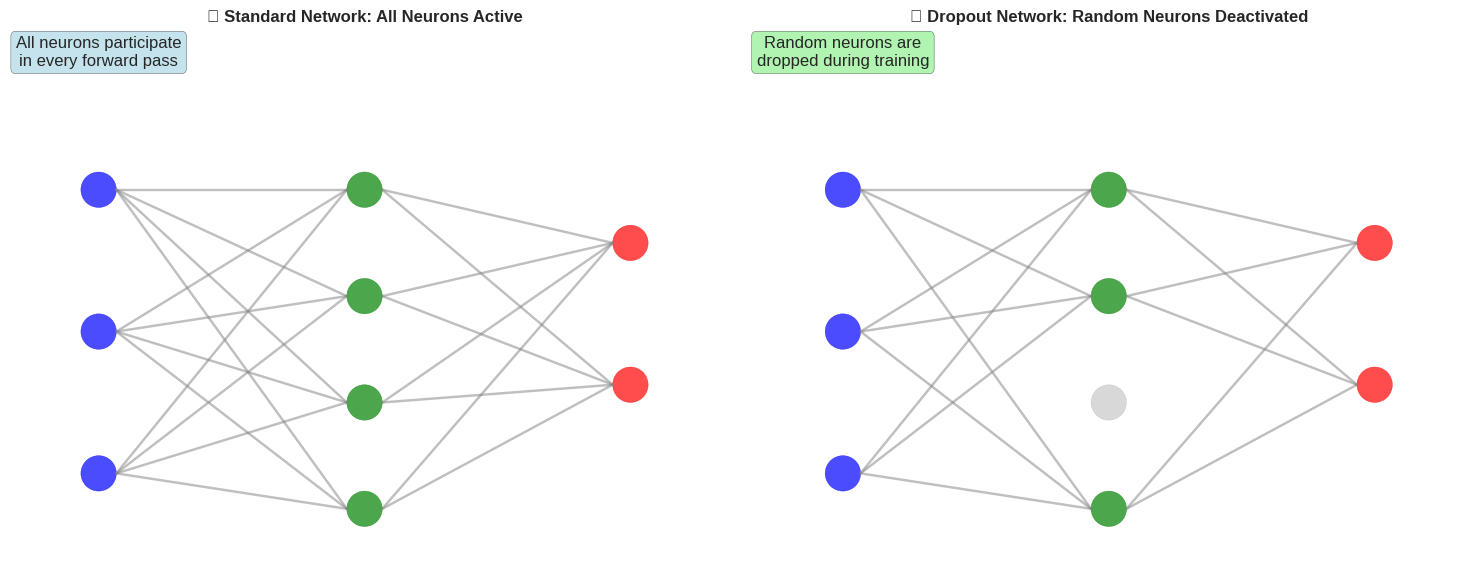

🧠 Dropout Analogy: Team Training
• Standard training = Whole team practices together every time
• Dropout training = Different team combinations practice each time
• Result: Team learns to be robust and doesn't rely on any single player!


In [14]:
def demonstrate_dropout():
    """Visual demonstration of how dropout works"""
    
    # Create a simple neural network visualization
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plot 1: Network without dropout
    ax1.set_title('🔵 Standard Network: All Neurons Active', fontweight='bold')
    ax1.set_xlim(0, 4)
    ax1.set_ylim(0, 3)
    
    # Input layer
    for i in range(3):
        ax1.add_patch(plt.Circle((0.5, 0.5 + i*0.8), 0.1, color='blue', alpha=0.7))
    
    # Hidden layer
    for i in range(4):
        ax1.add_patch(plt.Circle((2, 0.3 + i*0.6), 0.1, color='green', alpha=0.7))
    
    # Output layer
    for i in range(2):
        ax1.add_patch(plt.Circle((3.5, 1 + i*0.8), 0.1, color='red', alpha=0.7))
    
    # Connections
    for i in range(3):
        for j in range(4):
            ax1.plot([0.6, 1.9], [0.5 + i*0.8, 0.3 + j*0.6], 'gray', alpha=0.5)
    for i in range(4):
        for j in range(2):
            ax1.plot([2.1, 3.4], [0.3 + i*0.6, 1 + j*0.8], 'gray', alpha=0.5)
    
    ax1.text(0.5, 2.8, 'All neurons participate\nin every forward pass', 
             ha='center', fontsize=12, bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.7))
    
    # Plot 2: Network with dropout
    ax2.set_title('🟢 Dropout Network: Random Neurons Deactivated', fontweight='bold')
    ax2.set_xlim(0, 4)
    ax2.set_ylim(0, 3)
    
    # Input layer
    for i in range(3):
        ax2.add_patch(plt.Circle((0.5, 0.5 + i*0.8), 0.1, color='blue', alpha=0.7))
    
    # Hidden layer with some neurons dropped out
    active_neurons = [0, 2, 3]  # Only these neurons are active
    for i in range(4):
        if i in active_neurons:
            ax2.add_patch(plt.Circle((2, 0.3 + i*0.6), 0.1, color='green', alpha=0.7))
        else:
            ax2.add_patch(plt.Circle((2, 0.3 + i*0.6), 0.1, color='gray', alpha=0.3))
    
    # Output layer
    for i in range(2):
        ax2.add_patch(plt.Circle((3.5, 1 + i*0.8), 0.1, color='red', alpha=0.7))
    
    # Connections (only to active neurons)
    for i in range(3):
        for j in active_neurons:
            ax2.plot([0.6, 1.9], [0.5 + i*0.8, 0.3 + j*0.6], 'gray', alpha=0.5)
    for j in active_neurons:
        for k in range(2):
            ax2.plot([2.1, 3.4], [0.3 + j*0.6, 1 + k*0.8], 'gray', alpha=0.5)
    
    ax2.text(0.5, 2.8, 'Random neurons are\ndropped during training', 
             ha='center', fontsize=12, bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))
    
    for ax in [ax1, ax2]:
        ax.set_aspect('equal')
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    print("🧠 Dropout Analogy: Team Training")
    print("• Standard training = Whole team practices together every time")
    print("• Dropout training = Different team combinations practice each time")
    print("• Result: Team learns to be robust and doesn't rely on any single player!")

demonstrate_dropout()

## 6. Practical Guidelines & Rules of Thumb

In [15]:
def regularization_cheatsheet():
    """Quick reference guide for regularization methods"""
    
    guidelines = {
        'No Regularization': {
            'When to use': 'Large datasets, simple models',
            'How it works': 'No constraints on weights',
            'Pros': 'Maximum model capacity',
            'Cons': 'High risk of overfitting',
            'Hyperparameters': 'None',
            'Recommendation': '❌ Avoid for small datasets'
        },
        'L2 Regularization': {
            'When to use': 'Most cases, default choice',
            'How it works': 'Penalizes large weights',
            'Pros': 'Prevents overfitting, stable',
            'Cons': 'Doesn\'t create sparse models',
            'Hyperparameters': 'λ (0.001-0.1)',
            'Recommendation': '✅ Recommended default'
        },
        'L1 Regularization': {
            'When to use': 'Feature selection, sparse models',
            'How it works': 'Penalizes absolute weights',
            'Pros': 'Creates sparse models, feature selection',
            'Cons': 'Can be unstable with correlated features',
            'Hyperparameters': 'λ (0.001-0.1)',
            'Recommendation': '🔍 Use for feature importance'
        },
        'Dropout': {
            'When to use': 'Deep networks, computer vision',
            'How it works': 'Randomly drops neurons during training',
            'Pros': 'Very effective, prevents co-adaptation',
            'Cons': 'Longer training time',
            'Hyperparameters': 'keep_prob (0.5-0.8)',
            'Recommendation': '🏆 Great for deep networks'
        }
    }
    
    print("🎯 REGULARIZATION CHEATSHEET")
    print("=" * 70)
    
    for method, info in guidelines.items():
        print(f"\n🔹 {method}")
        print(f"   When to use: {info['When to use']}")
        print(f"   How it works: {info['How it works']}")
        print(f"   Pros: {info['Pros']}")
        print(f"   Cons: {info['Cons']}")
        print(f"   Hyperparameters: {info['Hyperparameters']}")
        print(f"   Recommendation: {info['Recommendation']}")
    
    print("\n💡 PRACTICAL TIPS:")
    print("• Start with L2 regularization (λ = 0.01)")
    print("• Add dropout for deep networks (keep_prob = 0.8)")
    print("• Use L1 for feature selection or interpretability")
    print("• Combine techniques: L2 + Dropout often works best")
    print("• Always monitor train/test performance gap")

regularization_cheatsheet()

🎯 REGULARIZATION CHEATSHEET

🔹 No Regularization
   When to use: Large datasets, simple models
   How it works: No constraints on weights
   Pros: Maximum model capacity
   Cons: High risk of overfitting
   Hyperparameters: None
   Recommendation: ❌ Avoid for small datasets

🔹 L2 Regularization
   When to use: Most cases, default choice
   How it works: Penalizes large weights
   Pros: Prevents overfitting, stable
   Cons: Doesn't create sparse models
   Hyperparameters: λ (0.001-0.1)
   Recommendation: ✅ Recommended default

🔹 L1 Regularization
   When to use: Feature selection, sparse models
   How it works: Penalizes absolute weights
   Pros: Creates sparse models, feature selection
   Cons: Can be unstable with correlated features
   Hyperparameters: λ (0.001-0.1)
   Recommendation: 🔍 Use for feature importance

🔹 Dropout
   When to use: Deep networks, computer vision
   How it works: Randomly drops neurons during training
   Pros: Very effective, prevents co-adaptation
   Cons: Lo

## 🎯 Key Takeaways: Regularization

### ✅ What You've Learned:
1. **Overfitting problem**: Models memorize noise instead of learning patterns
2. **Regularization techniques**: L1, L2, Dropout
3. **Practical implementation**: How to code and use each method
4. **Real-world application**: Football player positioning problem

### 🚀 Best Practices:
- Use **L2 regularization** as your default starting point
- Add **Dropout** for deep networks or when you see overfitting
- Use **L1** when you need feature selection or sparse models
- **Monitor generalization gap** to detect overfitting

### 💡 Pro Tip:
When in doubt, start with **L2 regularization (λ=0.01) + Dropout (keep_prob=0.8)** - this combination works well for most problems!

# Part 3: Gradient Checking — The Programmer's Safety Net

## 🎯 Why Gradient Checking?

### 🧠 Student Analogy: Double-Checking Your Work
Backpropagation is like solving a complex math problem:
- **Analytical gradients** = Your calculated answer
- **Numerical gradients** = Checking with calculator
- **Gradient checking** = Making sure they match!

### 🧮 Numerical Gradient Approximation
$$\frac{\partial J}{\partial \theta} \approx \frac{J(\theta + \epsilon) - J(\theta - \epsilon)}{2\epsilon}$$

## 1: The Simple Idea Behind Gradient Checking

In [16]:
# Let's understand with a simple example
def simple_function(x):
    """A simple function: f(x) = x²"""
    return x * x

# We know the derivative should be: f'(x) = 2x
def true_derivative(x):
    return 2 * x

def numerical_derivative(x, epsilon=0.01):
    """Calculate derivative using the gradient checking formula"""
    return (simple_function(x + epsilon) - simple_function(x - epsilon)) / (2 * epsilon)

# Test it out!
test_points = [-2, 0, 2, 4]

print("🧪 Testing Gradient Checking on f(x) = x²")
print("Point | True Derivative | Numerical | Difference")
print("-" * 50)

for x in test_points:
    true_grad = true_derivative(x)
    num_grad = numerical_derivative(x)
    diff = abs(true_grad - num_grad)
    status = "✅" if diff < 0.01 else "⚠️"
    print(f"x={x:2} | {true_grad:14.2f} | {num_grad:9.2f} | {diff:10.4f} {status}")

🧪 Testing Gradient Checking on f(x) = x²
Point | True Derivative | Numerical | Difference
--------------------------------------------------
x=-2 |          -4.00 |     -4.00 |     0.0000 ✅
x= 0 |           0.00 |      0.00 |     0.0000 ✅
x= 2 |           4.00 |      4.00 |     0.0000 ✅
x= 4 |           8.00 |      8.00 |     0.0000 ✅


## 2: 1D Gradient Checking (Easy Version)

In [17]:
class SimpleGradientChecker:
    """A simple gradient checker anyone can understand"""
    
    def check_1d(self, x, theta):
        """
        Check gradients for J(θ) = θ * x
        This is the simplest case to understand
        """
        print(f"\n🔍 Checking: J(θ) = θ * x, where x={x}, θ={theta}")
        
        # Step 1: Compute what backprop says (analytical gradient)
        analytical_grad = x  # Because dJ/dθ = x
        
        # Step 2: Compute using gradient checking (numerical gradient)
        epsilon = 0.0000001  # Very small number
        J_plus = (theta + epsilon) * x
        J_minus = (theta - epsilon) * x
        numerical_grad = (J_plus - J_minus) / (2 * epsilon)
        
        # Step 3: Compare them
        difference = abs(analytical_grad - numerical_grad)
        
        print(f"📊 Analytical gradient: {analytical_grad}")
        print(f"📊 Numerical gradient:  {numerical_grad}")
        print(f"📊 Difference: {difference:.8f}")
        
        if difference < 1e-7:
            print("✅ SUCCESS: Gradients match!")
        else:
            print("❌ FAIL: Gradients don't match!")
        
        return difference

# Let's test it!
checker = SimpleGradientChecker()

# Test cases
test_cases = [(2, 4), (3, 1), (5, -2)]

for x, theta in test_cases:
    checker.check_1d(x, theta)


🔍 Checking: J(θ) = θ * x, where x=2, θ=4
📊 Analytical gradient: 2
📊 Numerical gradient:  2.0000000011677344
📊 Difference: 0.00000000
✅ SUCCESS: Gradients match!

🔍 Checking: J(θ) = θ * x, where x=3, θ=1
📊 Analytical gradient: 3
📊 Numerical gradient:  2.9999999995311555
📊 Difference: 0.00000000
✅ SUCCESS: Gradients match!

🔍 Checking: J(θ) = θ * x, where x=5, θ=-2
📊 Analytical gradient: 5
📊 Numerical gradient:  4.999999996257998
📊 Difference: 0.00000000
✅ SUCCESS: Gradients match!


## 3: Real Neural Network Example

In [18]:
def simple_neural_network(X, W, b):
    """
    A very simple neural network:
    - Input: X
    - One layer: Z = WX + b
    - Output: A = sigmoid(Z)
    - Cost: binary cross-entropy
    """
    Z = np.dot(W, X) + b
    A = 1 / (1 + np.exp(-Z))  # sigmoid
    return A, Z

def simple_backward(X, Y, A, Z, W):
    """
    Simple backpropagation for our network
    """
    m = X.shape[1]
    dZ = A - Y
    dW = (1/m) * np.dot(dZ, X.T)
    db = (1/m) * np.sum(dZ, axis=1, keepdims=True)
    return dW, db

def check_neural_network_gradients():
    """Check gradients for our simple neural network"""
    
    print("\n🧠 Checking Gradients for Neural Network")
    print("=" * 50)
    
    # Fixed test data - shape: (features, examples)
    X = np.array([[1, 2]])  # 1 feature, 2 examples
    Y = np.array([[1, 0]])  # labels, same shape as output
    
    # Initialize parameters - shapes must match for matrix multiplication
    W = np.array([[0.5]])  # weight: (output_size, input_size) = (1, 1)
    b = np.array([[0.1]])  # bias: (output_size, 1) = (1, 1)
    
    # Forward pass
    A, Z = simple_neural_network(X, W, b)
    
    # Backward pass (analytical gradients)
    dW_analytical, db_analytical = simple_backward(X, Y, A, Z, W)
    
    print("Analytical gradients:")
    print(f"dW: {dW_analytical[0,0]:.6f}")
    print(f"db: {db_analytical[0,0]:.6f}")
    
    # Numerical gradients for W
    epsilon = 1e-7
    
    # Check dW
    W_plus = W + epsilon
    A_plus, _ = simple_neural_network(X, W_plus, b)
    cost_plus = -np.mean(Y * np.log(A_plus) + (1-Y) * np.log(1-A_plus))
    
    W_minus = W - epsilon
    A_minus, _ = simple_neural_network(X, W_minus, b)
    cost_minus = -np.mean(Y * np.log(A_minus) + (1-Y) * np.log(1-A_minus))
    
    dW_numerical = (cost_plus - cost_minus) / (2 * epsilon)
    
    # Check db
    b_plus = b + epsilon
    A_plus, _ = simple_neural_network(X, W, b_plus)
    cost_plus = -np.mean(Y * np.log(A_plus) + (1-Y) * np.log(1-A_plus))
    
    b_minus = b - epsilon
    A_minus, _ = simple_neural_network(X, W, b_minus)
    cost_minus = -np.mean(Y * np.log(A_minus) + (1-Y) * np.log(1-A_minus))
    
    db_numerical = (cost_plus - cost_minus) / (2 * epsilon)
    
    print("\nNumerical gradients:")
    print(f"dW: {dW_numerical:.6f}")
    print(f"db: {db_numerical:.6f}")
    
    # Compare
    dW_diff = abs(dW_analytical[0,0] - dW_numerical)
    db_diff = abs(db_analytical[0,0] - db_numerical)
    
    print(f"\nDifferences:")
    print(f"dW difference: {dW_diff:.8f}")
    print(f"db difference: {db_diff:.8f}")
    
    if dW_diff < 1e-7 and db_diff < 1e-7:
        print("🎉 ALL GRADIENTS ARE CORRECT!")
    else:
        print("💡 Small differences are normal with numerical methods")

check_neural_network_gradients()


🧠 Checking Gradients for Neural Network
Analytical gradients:
dW: 0.573088
db: 0.197958

Numerical gradients:
dW: 0.573088
db: 0.197958

Differences:
dW difference: 0.00000000
db difference: 0.00000000
🎉 ALL GRADIENTS ARE CORRECT!


## 4: When to Use Gradient Checking

In [19]:
def gradient_checking_guide():
    """Simple guide for students"""
    
    print("\n📚 GRADIENT CHECKING GUIDE")
    print("=" * 50)
    
    print("\n🎯 WHEN TO USE IT:")
    print("✅ After implementing backpropagation")
    print("✅ When your model isn't learning")
    print("✅ When you modify your network")
    print("✅ To debug gradient problems")
    
    print("\n⏰ WHEN NOT TO USE IT:")
    print("❌ During normal training (too slow)")
    print("❌ In your final code")
    print("❌ For every single iteration")
    
    print("\n💡 TIPS:")
    print("• Use epsilon = 1e-7")
    print("• Check both weights and biases")
    print("• If difference < 1e-7, you're good!")
    print("• If difference > 1e-5, check your code")

gradient_checking_guide()


📚 GRADIENT CHECKING GUIDE

🎯 WHEN TO USE IT:
✅ After implementing backpropagation
✅ When your model isn't learning
✅ When you modify your network
✅ To debug gradient problems

⏰ WHEN NOT TO USE IT:
❌ During normal training (too slow)
❌ In your final code
❌ For every single iteration

💡 TIPS:
• Use epsilon = 1e-7
• Check both weights and biases
• If difference < 1e-7, you're good!
• If difference > 1e-5, check your code


## 5: Common Mistakes & Fixes

In [20]:
def common_mistakes():
    """Common gradient checking mistakes"""
    
    print("\n🔧 COMMON MISTAKES & FIXES")
    print("=" * 50)
    
    mistakes = [
        {
            "mistake": "Wrong activation derivative",
            "example": "Using wrong formula for ReLU/sigmoid/tanh",
            "fix": "Double-check your derivative formulas"
        },
        {
            "mistake": "Forgetting 1/m factor", 
            "example": "Missing the average over examples",
            "fix": "Remember to divide by m (number of examples)"
        },
        {
            "mistake": "Matrix shape errors",
            "example": "Wrong dimensions in dot products",
            "fix": "Print shapes to debug dimension issues"
        },
        {
            "mistake": "Wrong epsilon value",
            "example": "Too large or too small epsilon",
            "fix": "Use epsilon around 1e-7"
        }
    ]
    
    for i, item in enumerate(mistakes, 1):
        print(f"\n{i}. {item['mistake']}")
        print(f"   Example: {item['example']}")
        print(f"   Fix: {item['fix']}")

common_mistakes()


🔧 COMMON MISTAKES & FIXES

1. Wrong activation derivative
   Example: Using wrong formula for ReLU/sigmoid/tanh
   Fix: Double-check your derivative formulas

2. Forgetting 1/m factor
   Example: Missing the average over examples
   Fix: Remember to divide by m (number of examples)

3. Matrix shape errors
   Example: Wrong dimensions in dot products
   Fix: Print shapes to debug dimension issues

4. Wrong epsilon value
   Example: Too large or too small epsilon
   Fix: Use epsilon around 1e-7


## 6: Your Turn - Practice Exercise

In [21]:
def practice_exercise():
    """Practice what you've learned"""
    
    print("\n💪 PRACTICE EXERCISE")
    print("=" * 50)
    
    print("""
Your task: Check gradients for J(θ) = θ² + 2θ

Step 1: What is the analytical gradient?
   dJ/dθ = 2θ + 2

Step 2: Implement gradient checking for θ = 3
   - Compute J(θ + ε) and J(θ - ε)
   - Use the formula: (J(θ+ε) - J(θ-ε)) / (2ε)
   - Compare with analytical gradient
    """)
    
    # Let the student think about it first
    input("Press Enter to see the solution...")
    
    # Solution
    print("\n🧠 SOLUTION:")
    theta = 3
    epsilon = 1e-7
    
    # Analytical gradient
    analytical = 2*theta + 2  # Should be 8
    
    # Numerical gradient
    def J(theta):
        return theta**2 + 2*theta
    
    J_plus = J(theta + epsilon)
    J_minus = J(theta - epsilon)
    numerical = (J_plus - J_minus) / (2 * epsilon)
    
    print(f"Analytical gradient: {analytical}")
    print(f"Numerical gradient:  {numerical}")
    print(f"Difference: {abs(analytical - numerical):.10f}")
    
    if abs(analytical - numerical) < 1e-7:
        print("✅ You got it right!")
    else:
        print("❌ Check your calculations")

practice_exercise()


💪 PRACTICE EXERCISE

Your task: Check gradients for J(θ) = θ² + 2θ

Step 1: What is the analytical gradient?
   dJ/dθ = 2θ + 2

Step 2: Implement gradient checking for θ = 3
   - Compute J(θ + ε) and J(θ - ε)
   - Use the formula: (J(θ+ε) - J(θ-ε)) / (2ε)
   - Compare with analytical gradient
    

🧠 SOLUTION:
Analytical gradient: 8
Numerical gradient:  7.999999986907369
Difference: 0.0000000131
✅ You got it right!


# Part 6: Optimization Methods — Beyond Basic Gradient Descent

## 🎯 The Evolution of Optimization

### 🧠 Student Analogy: Different Navigation Strategies
Think of optimization algorithms as different ways to navigate down a mountain:
- **Gradient Descent** = Walking straight downhill (simple but slow)
- **Momentum** = Like a ball rolling downhill (builds speed)
- **Adam** = Like a smart hiker with GPS (adapts to terrain)

### 📚 Learning Objectives
- Understand and implement Momentum, RMSProp, and Adam optimizers
- Visualize how different optimizers navigate loss landscapes
- Learn when to use each optimization method
- Compare optimizer performance on real problems

## 1. Visualizing Optimizer Behavior

📊 Visualizing optimizer paths on loss landscape...


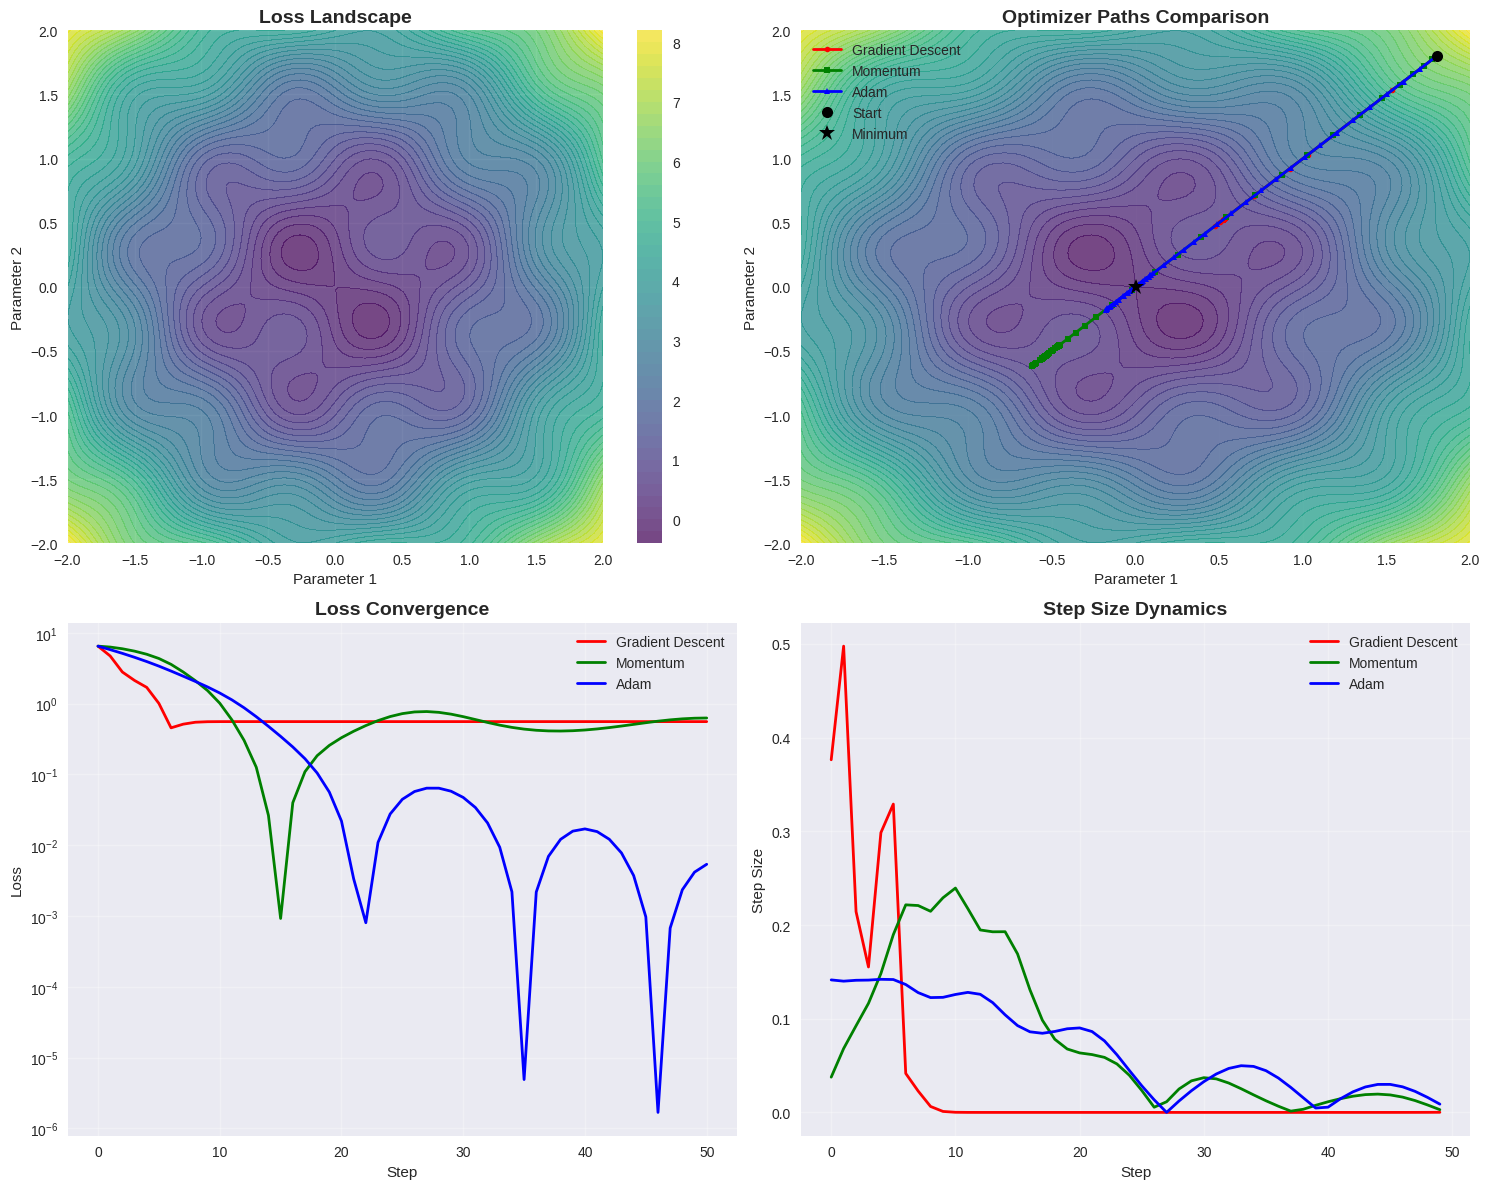

🔍 Optimizer Behavior Analysis:
• Gradient Descent: Direct but oscillatory path
• Momentum: Smoother path, builds speed in consistent directions
• Adam: Adaptive steps, handles noisy gradients well
• Notice how Adam takes more direct routes to the minimum!


In [22]:
def visualize_optimizer_paths():
    """Visualize how different optimizers navigate a loss landscape"""
    
    # Create a simple loss landscape
    x = np.linspace(-2, 2, 100)
    y = np.linspace(-2, 2, 100)
    X, Y = np.meshgrid(x, y)
    
    # Simple quadratic loss function with some noise
    Z = X**2 + Y**2 + 0.5 * np.sin(5*X) * np.sin(5*Y)
    
    # Starting point
    start_point = np.array([1.8, 1.8])
    
    # Define optimizers
    def gradient_descent_step(x, lr=0.1):
        grad_x = 2*x[0] + 2.5 * np.cos(5*x[0]) * np.sin(5*x[1])
        grad_y = 2*x[1] + 2.5 * np.sin(5*x[0]) * np.cos(5*x[1])
        return x - lr * np.array([grad_x, grad_y])
    
    def momentum_step(x, v, beta=0.9, lr=0.1):
        grad_x = 2*x[0] + 2.5 * np.cos(5*x[0]) * np.sin(5*x[1])
        grad_y = 2*x[1] + 2.5 * np.sin(5*x[0]) * np.cos(5*x[1])
        grad = np.array([grad_x, grad_y])
        v = beta * v + (1 - beta) * grad
        return x - lr * v, v
    
    def adam_step(x, m, v, t, lr=0.1, beta1=0.9, beta2=0.999, epsilon=1e-8):
        grad_x = 2*x[0] + 2.5 * np.cos(5*x[0]) * np.sin(5*x[1])
        grad_y = 2*x[1] + 2.5 * np.sin(5*x[0]) * np.cos(5*x[1])
        grad = np.array([grad_x, grad_y])
        
        # Update biased first moment estimate
        m = beta1 * m + (1 - beta1) * grad
        # Update biased second moment estimate
        v = beta2 * v + (1 - beta2) * (grad ** 2)
        
        # Compute bias-corrected first moment estimate
        m_hat = m / (1 - beta1 ** t)
        # Compute bias-corrected second moment estimate
        v_hat = v / (1 - beta2 ** t)
        
        # Update parameters
        x_new = x - lr * m_hat / (np.sqrt(v_hat) + epsilon)
        
        return x_new, m, v
    
    # Simulate optimization paths
    steps = 50
    
    # Gradient Descent
    gd_path = [start_point.copy()]
    current = start_point.copy()
    for _ in range(steps):
        current = gradient_descent_step(current)
        gd_path.append(current.copy())
    gd_path = np.array(gd_path)
    
    # Momentum
    momentum_path = [start_point.copy()]
    current = start_point.copy()
    velocity = np.zeros_like(current)
    for _ in range(steps):
        current, velocity = momentum_step(current, velocity)
        momentum_path.append(current.copy())
    momentum_path = np.array(momentum_path)
    
    # Adam
    adam_path = [start_point.copy()]
    current = start_point.copy()
    m = np.zeros_like(current)
    v = np.zeros_like(current)
    for t in range(1, steps + 1):
        current, m, v = adam_step(current, m, v, t)
        adam_path.append(current.copy())
    adam_path = np.array(adam_path)
    
    # Plot
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Plot 1: Loss landscape
    contour = axes[0, 0].contourf(X, Y, Z, levels=50, alpha=0.7, cmap='viridis')
    axes[0, 0].set_title('Loss Landscape', fontweight='bold', fontsize=14)
    axes[0, 0].set_xlabel('Parameter 1')
    axes[0, 0].set_ylabel('Parameter 2')
    plt.colorbar(contour, ax=axes[0, 0])
    
    # Plot 2: All paths together
    contour = axes[0, 1].contourf(X, Y, Z, levels=50, alpha=0.7, cmap='viridis')
    axes[0, 1].plot(gd_path[:, 0], gd_path[:, 1], 'r-', linewidth=2, label='Gradient Descent', marker='o', markersize=4)
    axes[0, 1].plot(momentum_path[:, 0], momentum_path[:, 1], 'g-', linewidth=2, label='Momentum', marker='s', markersize=4)
    axes[0, 1].plot(adam_path[:, 0], adam_path[:, 1], 'b-', linewidth=2, label='Adam', marker='^', markersize=4)
    axes[0, 1].plot(start_point[0], start_point[1], 'ko', markersize=8, label='Start')
    axes[0, 1].plot(0, 0, 'k*', markersize=12, label='Minimum')
    axes[0, 1].set_title('Optimizer Paths Comparison', fontweight='bold', fontsize=14)
    axes[0, 1].set_xlabel('Parameter 1')
    axes[0, 1].set_ylabel('Parameter 2')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)
    
    # Plot 3: Loss over time
    gd_loss = [gd_path[i, 0]**2 + gd_path[i, 1]**2 for i in range(len(gd_path))]
    momentum_loss = [momentum_path[i, 0]**2 + momentum_path[i, 1]**2 for i in range(len(momentum_path))]
    adam_loss = [adam_path[i, 0]**2 + adam_path[i, 1]**2 for i in range(len(adam_path))]
    
    axes[1, 0].plot(gd_loss, 'r-', linewidth=2, label='Gradient Descent')
    axes[1, 0].plot(momentum_loss, 'g-', linewidth=2, label='Momentum')
    axes[1, 0].plot(adam_loss, 'b-', linewidth=2, label='Adam')
    axes[1, 0].set_title('Loss Convergence', fontweight='bold', fontsize=14)
    axes[1, 0].set_xlabel('Step')
    axes[1, 0].set_ylabel('Loss')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)
    axes[1, 0].set_yscale('log')
    
    # Plot 4: Step sizes
    gd_steps = [np.linalg.norm(gd_path[i+1] - gd_path[i]) for i in range(len(gd_path)-1)]
    momentum_steps = [np.linalg.norm(momentum_path[i+1] - momentum_path[i]) for i in range(len(momentum_path)-1)]
    adam_steps = [np.linalg.norm(adam_path[i+1] - adam_path[i]) for i in range(len(adam_path)-1)]
    
    axes[1, 1].plot(gd_steps, 'r-', linewidth=2, label='Gradient Descent')
    axes[1, 1].plot(momentum_steps, 'g-', linewidth=2, label='Momentum')
    axes[1, 1].plot(adam_steps, 'b-', linewidth=2, label='Adam')
    axes[1, 1].set_title('Step Size Dynamics', fontweight='bold', fontsize=14)
    axes[1, 1].set_xlabel('Step')
    axes[1, 1].set_ylabel('Step Size')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("🔍 Optimizer Behavior Analysis:")
    print("• Gradient Descent: Direct but oscillatory path")
    print("• Momentum: Smoother path, builds speed in consistent directions")
    print("• Adam: Adaptive steps, handles noisy gradients well")
    print("• Notice how Adam takes more direct routes to the minimum!")

print("📊 Visualizing optimizer paths on loss landscape...")
visualize_optimizer_paths()

## 🧠 Mathematical Insight: Why Advanced Optimizers Work

### Momentum: Physical Analogy
Like a ball rolling downhill with inertia:
$$v_t = \beta v_{t-1} + (1-\beta) \nabla J(\theta_t)$$
$$\theta_{t+1} = \theta_t - \alpha v_t$$

### Adam: Adaptive Learning Rates
Combines momentum with per-parameter learning rate adjustment:
$$m_t = \beta_1 m_{t-1} + (1-\beta_1) g_t$$
$$v_t = \beta_2 v_{t-1} + (1-\beta_2) g_t^2$$
$$\hat{m}_t = \frac{m_t}{1-\beta_1^t}, \quad \hat{v}_t = \frac{v_t}{1-\beta_2^t}$$
$$\theta_{t+1} = \theta_t - \alpha \frac{\hat{m}_t}{\sqrt{\hat{v}_t} + \epsilon}$$

Let's implement a complete training comparison!

📊 Visualizing optimizer paths on quadratic function...
Running SGD...
  SGD: Final point = (0.0001, 1.0000)
Running Momentum...
  Momentum: Final point = (0.5915, -0.0305)
Running RMSProp...
  RMSProp: Final point = (2.7717, 0.0000)
Running Adam...
  Adam: Final point = (3.4849, -0.0048)


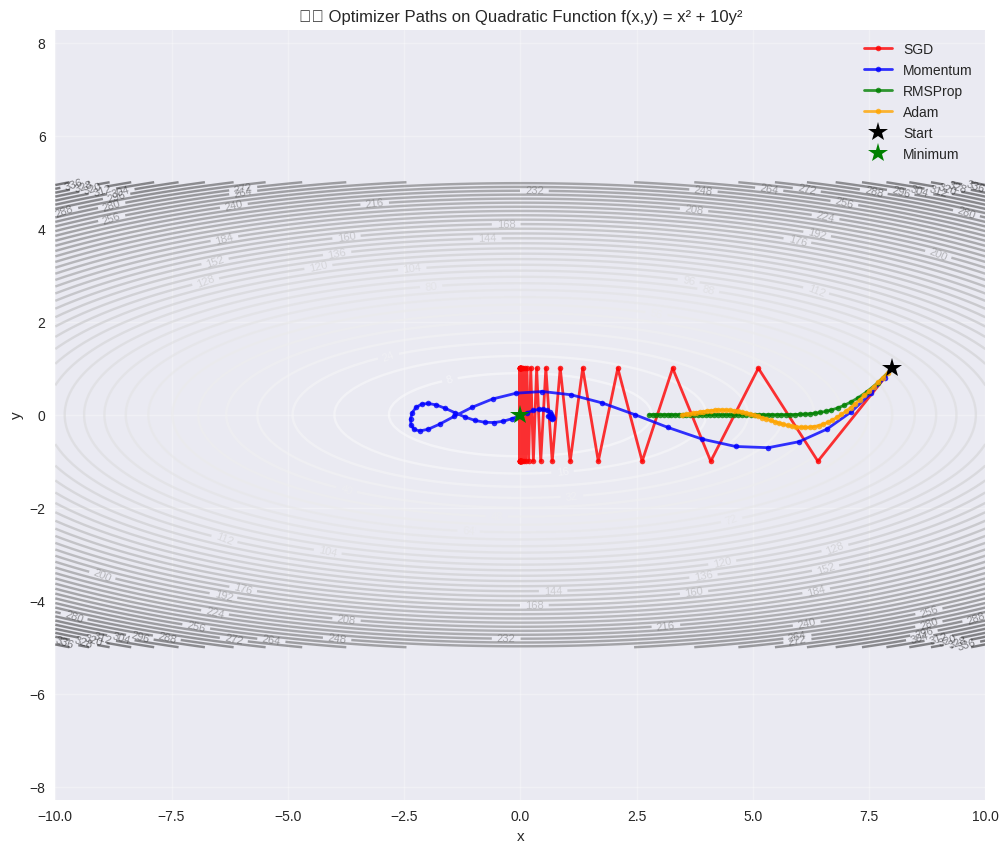

In [23]:
class AdvancedOptimizers:
    """Implementation of advanced optimization algorithms"""
    
    @staticmethod
    def sgd(params, grads, learning_rate=0.01):
        """Vanilla Stochastic Gradient Descent"""
        for i in range(len(params)):
            params[i] -= learning_rate * grads[i]
        return params
    
    @staticmethod
    def momentum(params, grads, velocity, learning_rate=0.01, beta=0.9):
        """Momentum optimizer"""
        for i in range(len(params)):
            velocity[i] = beta * velocity[i] + (1 - beta) * grads[i]
            params[i] -= learning_rate * velocity[i]
        return params, velocity
    
    @staticmethod
    def rmsprop(params, grads, cache, learning_rate=0.01, beta=0.9, epsilon=1e-8):
        """RMSProp optimizer"""
        for i in range(len(params)):
            cache[i] = beta * cache[i] + (1 - beta) * grads[i]**2
            params[i] -= learning_rate * grads[i] / (np.sqrt(cache[i]) + epsilon)
        return params, cache
    
    @staticmethod
    def adam(params, grads, m, v, t, learning_rate=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8):
        """Adam optimizer"""
        for i in range(len(params)):
            # Update biased first moment estimate
            m[i] = beta1 * m[i] + (1 - beta1) * grads[i]  
            
            # Update biased second moment estimate
            v[i] = beta2 * v[i] + (1 - beta2) * grads[i]**2
            
            # Compute bias-corrected first moment estimate
            m_hat = m[i] / (1 - beta1**t)
            
            # Compute bias-corrected second moment estimate
            v_hat = v[i] / (1 - beta2**t)
            
            # Update parameters
            params[i] -= learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)
            
        return params, m, v

# Visualize optimizer behavior on a test function
def visualize_optimizers():
    """Compare optimizer paths on a simple quadratic function"""
    
    # Test function: f(x, y) = x^2 + 10y^2 (poorly conditioned)
    def f(x, y):
        return x**2 + 10*y**2
    
    def grad_f(x, y):
        return np.array([2*x, 20*y])
    
    # Starting point
    start_point = np.array([8.0, 1.0])
    
    # Optimizer configurations
    optimizers = {
        'SGD': {'lr': 0.1},
        'Momentum': {'lr': 0.1, 'beta': 0.9},
        'RMSProp': {'lr': 0.1, 'beta': 0.9},
        'Adam': {'lr': 0.1, 'beta1': 0.9, 'beta2': 0.999}
    }
    
    # Create contour plot
    x = np.linspace(-10, 10, 100)
    y = np.linspace(-5, 5, 100)
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    
    plt.figure(figsize=(12, 10))
    
    # Plot contours
    contour = plt.contour(X, Y, Z, levels=50, alpha=0.5)
    plt.clabel(contour, inline=True, fontsize=8)
    
    colors = ['red', 'blue', 'green', 'orange']
    
    for idx, (name, config) in enumerate(optimizers.items()):
        print(f"Running {name}...")
        
        # Initialize - keep params as numpy array, convert to list only for optimizer calls
        params = start_point.copy()
        path = [params.copy()]
        
        if name == 'SGD':
            for step in range(50):
                grad = grad_f(params[0], params[1])
                # Convert to list for optimizer, then convert back
                params_list = AdvancedOptimizers.sgd([params], [grad], config['lr'])
                params = params_list[0]  # Extract first element
                path.append(params.copy())
                
        elif name == 'Momentum':
            velocity = [np.zeros_like(params)]
            for step in range(50):
                grad = grad_f(params[0], params[1])
                params_list, velocity = AdvancedOptimizers.momentum(
                    [params], [grad], velocity, config['lr'], config['beta']
                )
                params = params_list[0]  # Extract first element
                path.append(params.copy())
                
        elif name == 'RMSProp':
            cache = [np.zeros_like(params)]
            for step in range(50):
                grad = grad_f(params[0], params[1])
                params_list, cache = AdvancedOptimizers.rmsprop(
                    [params], [grad], cache, config['lr'], config['beta']
                )
                params = params_list[0]  # Extract first element
                path.append(params.copy())
                
        elif name == 'Adam':
            m = [np.zeros_like(params)]
            v = [np.zeros_like(params)]
            for step in range(50):
                grad = grad_f(params[0], params[1])
                params_list, m, v = AdvancedOptimizers.adam(
                    [params], [grad], m, v, step+1, config['lr'], 
                    config['beta1'], config.get('beta2', 0.999)
                )
                params = params_list[0]  # Extract first element
                path.append(params.copy())
        
        # Plot path
        path = np.array(path)
        plt.plot(path[:, 0], path[:, 1], 'o-', linewidth=2, markersize=4, 
                label=name, color=colors[idx], alpha=0.8)
        
        print(f"  {name}: Final point = ({params[0]:.4f}, {params[1]:.4f})")
    
    plt.plot(start_point[0], start_point[1], 'k*', markersize=15, label='Start')
    plt.plot(0, 0, 'g*', markersize=15, label='Minimum')
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('🛣️ Optimizer Paths on Quadratic Function f(x,y) = x² + 10y²')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.axis('equal')
    plt.show()

print("📊 Visualizing optimizer paths on quadratic function...")
visualize_optimizers()

## 2. Implementation: Advanced Optimizers

In [24]:
class AdvancedOptimizers:
    """Implementation of advanced optimization algorithms"""
    
    @staticmethod
    def gradient_descent(parameters, grads, learning_rate):
        """Vanilla Gradient Descent"""
        updated_params = {}
        L = len(parameters) // 2 
        
        for l in range(L):
            updated_params[f"W{l+1}"] = parameters[f"W{l+1}"] - learning_rate * grads[f"dW{l+1}"]
            updated_params[f"b{l+1}"] = parameters[f"b{l+1}"] - learning_rate * grads[f"db{l+1}"]
        
        return updated_params
    
    @staticmethod
    def momentum(parameters, grads, velocity, beta=0.9, learning_rate=0.01):
        """Gradient Descent with Momentum"""
        updated_params = {}
        updated_velocity = {}
        L = len(parameters) // 2
        
        for l in range(L):
            # Update velocity
            updated_velocity[f"dW{l+1}"] = beta * velocity[f"dW{l+1}"] + (1 - beta) * grads[f"dW{l+1}"]
            updated_velocity[f"db{l+1}"] = beta * velocity[f"db{l+1}"] + (1 - beta) * grads[f"db{l+1}"]
            
            # Update parameters
            updated_params[f"W{l+1}"] = parameters[f"W{l+1}"] - learning_rate * updated_velocity[f"dW{l+1}"]
            updated_params[f"b{l+1}"] = parameters[f"b{l+1}"] - learning_rate * updated_velocity[f"db{l+1}"]
        
        return updated_params, updated_velocity
    
    @staticmethod
    def rmsprop(parameters, grads, s, beta=0.9, learning_rate=0.01, epsilon=1e-8):
        """RMSProp optimizer"""
        updated_params = {}
        updated_s = {}
        L = len(parameters) // 2
        
        for l in range(L):
            # Update cache with squared gradients
            updated_s[f"dW{l+1}"] = beta * s[f"dW{l+1}"] + (1 - beta) * (grads[f"dW{l+1}"] ** 2)
            updated_s[f"db{l+1}"] = beta * s[f"db{l+1}"] + (1 - beta) * (grads[f"db{l+1}"] ** 2)
            
            # Update parameters
            updated_params[f"W{l+1}"] = parameters[f"W{l+1}"] - learning_rate * grads[f"dW{l+1}"] / (np.sqrt(updated_s[f"dW{l+1}"]) + epsilon)
            updated_params[f"b{l+1}"] = parameters[f"b{l+1}"] - learning_rate * grads[f"db{l+1}"] / (np.sqrt(updated_s[f"db{l+1}"]) + epsilon)
        
        return updated_params, updated_s
    
    @staticmethod
    def adam(parameters, grads, v, s, t, learning_rate=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8):
        """Adam optimizer"""
        updated_params = {}
        updated_v = {}
        updated_s = {}
        L = len(parameters) // 2
        
        for l in range(L):
            # Update biased first moment estimate
            updated_v[f"dW{l+1}"] = beta1 * v[f"dW{l+1}"] + (1 - beta1) * grads[f"dW{l+1}"]
            updated_v[f"db{l+1}"] = beta1 * v[f"db{l+1}"] + (1 - beta1) * grads[f"db{l+1}"]
            
            # Update biased second moment estimate
            updated_s[f"dW{l+1}"] = beta2 * s[f"dW{l+1}"] + (1 - beta2) * (grads[f"dW{l+1}"] ** 2)
            updated_s[f"db{l+1}"] = beta2 * s[f"db{l+1}"] + (1 - beta2) * (grads[f"db{l+1}"] ** 2)
            
            # Compute bias-corrected first moment estimate
            v_corrected_W = updated_v[f"dW{l+1}"] / (1 - beta1 ** t)
            v_corrected_b = updated_v[f"db{l+1}"] / (1 - beta1 ** t)
            
            # Compute bias-corrected second moment estimate
            s_corrected_W = updated_s[f"dW{l+1}"] / (1 - beta2 ** t)
            s_corrected_b = updated_s[f"db{l+1}"] / (1 - beta2 ** t)
            
            # Update parameters
            updated_params[f"W{l+1}"] = parameters[f"W{l+1}"] - learning_rate * v_corrected_W / (np.sqrt(s_corrected_W) + epsilon)
            updated_params[f"b{l+1}"] = parameters[f"b{l+1}"] - learning_rate * v_corrected_b / (np.sqrt(s_corrected_b) + epsilon)
        
        return updated_params, updated_v, updated_s

print("✅ Advanced optimizer classes defined!")
print("\n📝 Available optimizers:")
print("   • Gradient Descent - Simple but effective")
print("   • Momentum - Builds velocity in consistent directions")
print("   • RMSProp - Adapts learning rates per parameter")
print("   • Adam - Combines Momentum and RMSProp (recommended)")

✅ Advanced optimizer classes defined!

📝 Available optimizers:
   • Gradient Descent - Simple but effective
   • Momentum - Builds velocity in consistent directions
   • RMSProp - Adapts learning rates per parameter
   • Adam - Combines Momentum and RMSProp (recommended)


## 3. Hands-On: Compare Optimizers on Real Problem

In [ ]:
def compare_optimizers():
    """Compare different optimization algorithms on a classification problem"""
    
    # Generate dataset
    X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)
    y = y.reshape(-1, 1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Enhanced neural network with different optimizers
    class OptimizedNN:
        def __init__(self, layer_sizes=[2, 10, 10, 1], optimizer='adam', learning_rate=0.01):
            self.layer_sizes = layer_sizes
            self.optimizer = optimizer
            self.lr = learning_rate
            self.initialize_parameters()
            self.initialize_optimizer()
            
        def initialize_parameters(self):
            """Initialize parameters using He initialization"""
            self.parameters = {}
            for i in range(len(self.layer_sizes) - 1):
                self.parameters[f"W{i+1}"] = InitializationMethods.he((self.layer_sizes[i], self.layer_sizes[i+1]))
                self.parameters[f"b{i+1}"] = np.zeros((1, self.layer_sizes[i+1]))
        
        def initialize_optimizer(self):
            """Initialize optimizer states"""
            if self.optimizer == 'momentum':
                self.velocity = {}
                for i in range(len(self.layer_sizes) - 1):
                    self.velocity[f"dW{i+1}"] = np.zeros_like(self.parameters[f"W{i+1}"])
                    self.velocity[f"db{i+1}"] = np.zeros_like(self.parameters[f"b{i+1}"])
            elif self.optimizer == 'rmsprop':
                self.s = {}
                for i in range(len(self.layer_sizes) - 1):
                    self.s[f"dW{i+1}"] = np.zeros_like(self.parameters[f"W{i+1}"])
                    self.s[f"db{i+1}"] = np.zeros_like(self.parameters[f"b{i+1}"])
            elif self.optimizer == 'adam':
                self.v = {}
                self.s = {}
                for i in range(len(self.layer_sizes) - 1):
                    self.v[f"dW{i+1}"] = np.zeros_like(self.parameters[f"W{i+1}"])
                    self.v[f"db{i+1}"] = np.zeros_like(self.parameters[f"b{i+1}"])
                    self.s[f"dW{i+1}"] = np.zeros_like(self.parameters[f"W{i+1}"])
                    self.s[f"db{i+1}"] = np.zeros_like(self.parameters[f"b{i+1}"])
            self.t = 1  # Adam time step
        
        def forward(self, X):
            """Forward propagation"""
            self.cache = {'A0': X}
            A = X
            
            # Hidden layers with ReLU
            for i in range(1, len(self.layer_sizes) - 1):
                Z = A @ self.parameters[f"W{i}"] + self.parameters[f"b{i}"]  # z = x @ w + b (on scale)
                A = np.maximum(0, Z)  # ReLU # class activation 
                self.cache[f"Z{i}"] = Z
                self.cache[f"A{i}"] = A
            
            # Output layer with sigmoid
            Z_out = A @ self.parameters[f"W{len(self.layer_sizes)-1}"] + self.parameters[f"b{len(self.layer_sizes)-1}"]
            A_out = 1 / (1 + np.exp(-Z_out)) # sigmoid # softamx (remmber softamx + loss)
            self.cache[f"Z{len(self.layer_sizes)-1}"] = Z_out
            self.cache[f"A{len(self.layer_sizes)-1}"] = A_out
            
            return A_out
        
        def compute_loss(self, y_pred, y_true):
            """Binary cross-entropy loss"""
            y_pred = np.clip(y_pred, 1e-12, 1 - 1e-12) # for numerical stability 
            return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
        
        def backward(self, X, y, y_pred):
            """Backward propagation"""
            m = X.shape[0]
            grads = {}
            
            # Output layer gradient
            dZ = (y_pred - y) / m
            L = len(self.layer_sizes) - 1
            
            grads[f"dW{L}"] = self.cache[f"A{L-1}"].T @ dZ
            grads[f"db{L}"] = np.sum(dZ, axis=0, keepdims=True)
            
            # Backpropagate through hidden layers
            for l in reversed(range(1, L)):
                dA = dZ @ self.parameters[f"W{l+1}"].T
                dZ = dA * (self.cache[f"Z{l}"] > 0)  # ReLU derivative
                grads[f"dW{l}"] = self.cache[f"A{l-1}"].T @ dZ
                grads[f"db{l}"] = np.sum(dZ, axis=0, keepdims=True) 
            
            return grads
        
        def update_parameters(self, grads):
            """Update parameters using selected optimizer"""
            if self.optimizer == 'gd':
                self.parameters = AdvancedOptimizers.gradient_descent(self.parameters, grads, self.lr)
            elif self.optimizer == 'momentum':
                self.parameters, self.velocity = AdvancedOptimizers.momentum(
                    self.parameters, grads, self.velocity, learning_rate=self.lr
                )
            elif self.optimizer == 'rmsprop':
                self.parameters, self.s = AdvancedOptimizers.rmsprop(
                    self.parameters, grads, self.s, learning_rate=self.lr
                )
            elif self.optimizer == 'adam':
                self.parameters, self.v, self.s = AdvancedOptimizers.adam(
                    self.parameters, grads, self.v, self.s, self.t, learning_rate=self.lr
                )
                self.t += 1
        
        def train(self, X, y, epochs=1000, verbose=True):
            """Training loop"""
            losses = []
            
            for epoch in range(epochs):
                # Forward pass
                y_pred = self.forward(X)
                loss = self.compute_loss(y_pred, y)
                losses.append(loss)
                
                # Backward pass
                grads = self.backward(X, y, y_pred)
                
                # Update parameters
                self.update_parameters(grads)
                
                if verbose and epoch % 200 == 0:
                    accuracy = np.mean((y_pred > 0.5) == y)
                    print(f"Epoch {epoch}: Loss = {loss:.4f}, Accuracy = {accuracy:.2%}")
            
            return losses
        
        def predict(self, X):
            """Make predictions"""
            y_pred = self.forward(X)
            return (y_pred > 0.5).astype(int)
        
        def accuracy(self, X, y):
            """Compute accuracy"""
            predictions = self.predict(X)
            return np.mean(predictions == y)
    
    # Test different optimizers
    optimizers = ['gd', 'momentum', 'rmsprop', 'adam']
    results = {}
    
    plt.figure(figsize=(15, 10))
    
    for optimizer in optimizers:
        print(f"\n🚀 Training with {optimizer.upper()} optimizer...")
        
        np.random.seed(42)
        model = OptimizedNN(
            layer_sizes=[2, 20, 10, 1],
            optimizer=optimizer,
            learning_rate=0.01
        )
        
        losses = model.train(X_train, y_train, epochs=1000, verbose=False)
        
        train_acc = model.accuracy(X_train, y_train)
        test_acc = model.accuracy(X_test, y_test)
        
        results[optimizer] = {
            'losses': losses,
            'train_acc': train_acc,
            'test_acc': test_acc,
            'final_loss': losses[-1]
        }
        
        print(f"  Final Loss: {losses[-1]:.4f}")
        print(f"  Train Accuracy: {train_acc:.2%}")
        print(f"  Test Accuracy: {test_acc:.2%}")
    
    # Plot results
    plt.subplot(2, 2, 1)
    for optimizer in optimizers:
        plt.plot(results[optimizer]['losses'], label=optimizer.upper(), linewidth=2)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss Comparison', fontweight='bold')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.yscale('log')
    
    plt.subplot(2, 2, 2)
    train_accs = [results[opt]['train_acc'] for opt in optimizers]
    test_accs = [results[opt]['test_acc'] for opt in optimizers]
    
    x = np.arange(len(optimizers))
    width = 0.35
    
    plt.bar(x - width/2, train_accs, width, label='Train', alpha=0.8)
    plt.bar(x + width/2, test_accs, width, label='Test', alpha=0.8)
    
    for i, (train_acc, test_acc) in enumerate(zip(train_accs, test_accs)):
        plt.text(i - width/2, train_acc + 0.01, f'{train_acc:.1%}', ha='center', va='bottom', fontsize=9)
        plt.text(i + width/2, test_acc + 0.01, f'{test_acc:.1%}', ha='center', va='bottom', fontsize=9)
    
    plt.xlabel('Optimizer')
    plt.ylabel('Accuracy')
    plt.title('Final Accuracy Comparison', fontweight='bold')
    plt.xticks(x, [opt.upper() for opt in optimizers])
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.subplot(2, 2, 3)
    convergence_speed = [np.argmax(np.array(results[opt]['losses']) < 0.5) for opt in optimizers]
    
    plt.bar([opt.upper() for opt in optimizers], convergence_speed, alpha=0.8)
    plt.xlabel('Optimizer')
    plt.ylabel('Epochs to Loss < 0.5')
    plt.title('Convergence Speed', fontweight='bold')
    plt.grid(True, alpha=0.3)
    
    for i, speed in enumerate(convergence_speed):
        plt.text(i, speed + 5, f'{speed}', ha='center', va='bottom', fontweight='bold')
    
    plt.subplot(2, 2, 4)
    # Show best model's decision boundary
    best_optimizer = max(results.keys(), key=lambda x: results[x]['test_acc'])
    
    np.random.seed(42)
    best_model = OptimizedNN(optimizer=best_optimizer, learning_rate=0.01)
    best_model.train(X_train, y_train, epochs=1000, verbose=False)
    
    # Create mesh for decision boundary
    h = 0.02
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Predict for mesh points
    Z = best_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdBu)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train.ravel(), cmap=plt.cm.RdBu, alpha=0.6, s=30)
    plt.title(f'Best Model: {best_optimizer.upper()}\nDecision Boundary', fontweight='bold')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print summary
    print("\n📊 OPTIMIZER COMPARISON SUMMARY")
    print("=" * 60)
    for optimizer in optimizers:
        result = results[optimizer]
        speed = convergence_speed[optimizers.index(optimizer)]
        print(f"{optimizer.upper():10} | Loss: {result['final_loss']:.4f} | "
              f"Train: {result['train_acc']:.2%} | Test: {result['test_acc']:.2%} | "
              f"Speed: {speed} epochs")
    
    print(f"\n🎯 Best optimizer: {best_optimizer.upper()} with {results[best_optimizer]['test_acc']:.2%} test accuracy")

print("🧪 Comparing optimization algorithms...")
compare_optimizers()

🧪 Comparing optimization algorithms...

🚀 Training with GD optimizer...
  Final Loss: 0.2875
  Train Accuracy: 85.86%
  Test Accuracy: 87.67%

🚀 Training with MOMENTUM optimizer...
  Final Loss: 0.2877
  Train Accuracy: 85.86%
  Test Accuracy: 87.67%

🚀 Training with RMSPROP optimizer...
  Final Loss: 0.0514
  Train Accuracy: 97.86%
  Test Accuracy: 98.00%

🚀 Training with ADAM optimizer...
  Final Loss: 0.0437
  Train Accuracy: 98.00%
  Test Accuracy: 97.33%


## 4. Optimizer Cheatsheet & Guidelines

In [ ]:
def optimizer_cheatsheet():
    """Comprehensive guide to optimization algorithms"""
    
    optimizers_info = {
        'Gradient Descent': {
            'Intuition': 'Walk straight downhill',
            'Best for': 'Simple problems, convex functions',
            'Pros': 'Simple, guaranteed convergence for convex functions',
            'Cons': 'Slow, oscillates in ravines',
            'Hyperparameters': 'Learning rate',
            'Learning Rate': '0.01-0.1',
            'Recommendation': '❌ Avoid for deep learning'
        },
        'Momentum': {
            'Intuition': 'Ball rolling downhill',
            'Best for': 'Problems with high curvature',
            'Pros': 'Faster convergence, reduces oscillations',
            'Cons': 'Can overshoot minimum',
            'Hyperparameters': 'Learning rate, β (0.9)',
            'Learning Rate': '0.01-0.1',
            'Recommendation': '✅ Good for RNNs'
        },
        'RMSProp': {
            'Intuition': 'Adapt step sizes per parameter',
            'Best for': 'Non-stationary objectives, online learning',
            'Pros': 'Adapts learning rates, handles sparse gradients',
            'Cons': 'Can be unstable',
            'Hyperparameters': 'Learning rate, β (0.9)',
            'Learning Rate': '0.001-0.01',
            'Recommendation': '✅ Good default'
        },
        'Adam': {
            'Intuition': 'Momentum + RMSProp + bias correction',
            'Best for': 'Most deep learning problems',
            'Pros': 'Fast convergence, handles noisy gradients',
            'Cons': 'More memory, hyperparameter sensitive',
            'Hyperparameters': 'Learning rate, β₁ (0.9), β₂ (0.999)',
            'Learning Rate': '0.001-0.01',
            'Recommendation': '🏆 Recommended default'
        }
    }
    
    print("🎯 OPTIMIZER CHEATSHEET")
    print("=" * 80)
    
    for optimizer, info in optimizers_info.items():
        print(f"\n🔹 {optimizer}")
        print(f"   Intuition: {info['Intuition']}")
        print(f"   Best for: {info['Best for']}")
        print(f"   Pros: {info['Pros']}")
        print(f"   Cons: {info['Cons']}")
        print(f"   Hyperparameters: {info['Hyperparameters']}")
        print(f"   Learning Rate: {info['Learning Rate']}")
        print(f"   Recommendation: {info['Recommendation']}")
    
    print("\n💡 PRACTICAL TIPS:")
    print("• Start with Adam (learning_rate=0.001)")
    print("• Use learning rate scheduling with Adam")
    print("• Try different optimizers for different architectures")
    print("• Monitor training curves to detect optimization issues")
    print("• Combine with good initialization and regularization")
    
    print("\n🚀 WHEN TO USE WHICH:")
    print("• Computer Vision: Adam or RMSProp")
    print("• Natural Language Processing: Adam with warmup")
    print("• Reinforcement Learning: RMSProp or Adam")
    print("• Simple Models: Gradient Descent or Momentum")

optimizer_cheatsheet()

## 🎯 Key Takeaways: Optimization Methods

### ✅ What You've Learned:
1. **Optimizer evolution**: From simple GD to adaptive methods like Adam
2. **Momentum**: Builds velocity in consistent gradient directions
3. **RMSProp**: Adapts learning rates per parameter
4. **Adam**: Combines Momentum and RMSProp with bias correction

### 🚀 Best Practices:
- Use **Adam** as your default optimizer for most problems
- Start with **learning_rate=0.001** for Adam
- Combine with **learning rate scheduling** for best results
- Monitor **training curves** to detect optimization issues

### 💡 Pro Tip:
**Adam with learning rate scheduling** is the most robust choice for modern deep learning. It combines fast convergence with good final performance across a wide range of problems!

# Part 4: Hyperparameter Tuning — The Art and Science

## 🎯 Systematic Hyperparameter Optimization

### 🧠 Student Analogy: Recipe Optimization
Finding hyperparameters is like perfecting a recipe:
- **Learning rate** = Cooking temperature
- **Batch size** = Number of servings cooked at once
- **Network architecture** = Kitchen equipment
- **Regularization** = Seasoning amount

In [ ]:
# Simple Neural Network for hyperparameter tuning
class SimpleNN:
    """A small feedforward neural network for hyperparameter tuning demonstrations"""
    def __init__(self, layer_sizes=[2, 16, 8, 1], learning_rate=0.01, l2_lambda=0.0):
        self.layer_sizes = layer_sizes
        self.lr = learning_rate
        self.l2 = l2_lambda
        self._init_weights()
        
    def _init_weights(self):
        self.weights = []
        self.biases = []
        for i in range(len(self.layer_sizes)-1):
            # He initialization
            W = np.random.randn(self.layer_sizes[i], self.layer_sizes[i+1]) * np.sqrt(2/self.layer_sizes[i])
            b = np.zeros((1, self.layer_sizes[i+1]))
            self.weights.append(W)
            self.biases.append(b)
    
    def _forward(self, X):
        self.a = [X]
        self.z = []
        
        # Hidden layers with ReLU
        for i in range(len(self.weights)-1):
            z = self.a[-1] @ self.weights[i] + self.biases[i]
            self.z.append(z)
            a = np.maximum(0, z)  # ReLU
            self.a.append(a)
        
        # Output layer with sigmoid
        z_out = self.a[-1] @ self.weights[-1] + self.biases[-1]
        self.z.append(z_out)
        a_out = 1/(1+np.exp(-z_out))  # Sigmoid
        self.a.append(a_out)
        
        return a_out
    
    def _compute_loss(self, y_pred, y_true):
        y_pred = np.clip(y_pred, 1e-12, 1-1e-12)
        # Binary cross-entropy
        bce = -np.mean(y_true*np.log(y_pred) + (1-y_true)*np.log(1-y_pred))
        # L2 regularization
        reg = sum(np.sum(W**2) for W in self.weights) * self.l2 / (2*len(y_true))
        return bce + reg
    
    def _backward(self, y_true):
        n = y_true.shape[0]
        dL_dz = (self.a[-1]-y_true)/n
        grads_W = []
        grads_b = []
        
        # Backward through layers
        for i in reversed(range(len(self.weights))):
            grad_W = self.a[i].T @ dL_dz + self.l2/self.a[i].shape[0]*self.weights[i]
            grad_b = np.sum(dL_dz, axis=0, keepdims=True)
            grads_W.insert(0, grad_W)
            grads_b.insert(0, grad_b)
            
            if i > 0:  # Propagate to previous layer
                dL_da = dL_dz @ self.weights[i].T
                dL_dz = dL_da * (self.z[i-1]>0)  # ReLU derivative
                
        return grads_W, grads_b
    
    def train(self, X_train, y_train, X_val=None, y_val=None, epochs=100):
        self.train_loss_history = []
        self.val_loss_history = [] if y_val is not None else None
        
        for ep in range(epochs):
            y_pred = self._forward(X_train)
            train_loss = self._compute_loss(y_pred, y_train)
            self.train_loss_history.append(train_loss)
            
            grads_W, grads_b = self._backward(y_train)
            
            # Update weights
            for i in range(len(self.weights)):
                self.weights[i] -= self.lr*grads_W[i]
                self.biases[i] -= self.lr*grads_b[i]
            
            # Validation
            if X_val is not None:
                y_val_pred = self._forward(X_val)
                val_loss = self._compute_loss(y_val_pred, y_val)
                self.val_loss_history.append(val_loss)
                
        return self.train_loss_history, self.val_loss_history

# Student-friendly Hyperparameter Tuner
class StudentTuner:
    def __init__(self):
        self.results = []
    
    def grid_search(self, X_train, y_train, X_val, y_val, param_grid, epochs=100):
        from itertools import product
        
        param_names = list(param_grid.keys())
        param_values = list(param_grid.values())
        best_score = float('inf')
        best_params = None
        
        plt.figure(figsize=(12,6))
        
        print("🔍 Starting Grid Search...")
        print(f"Testing {len(list(product(*param_values)))} combinations")
        
        for idx, combo in enumerate(product(*param_values)):
            params = dict(zip(param_names, combo))
            print(f"Testing combination {idx+1}: {params}")
            
            model = SimpleNN(
                layer_sizes=[2, params.get('hidden_units',16), 8, 1],
                learning_rate=params.get('learning_rate',0.01),
                l2_lambda=params.get('l2_lambda',0.0)
            )
            
            train_loss, val_loss = model.train(X_train, y_train, X_val, y_val, epochs=epochs)
            
            self.results.append({'params': params, 'train_loss': train_loss, 'val_loss': val_loss})
            
            # Plot losses
            plt.plot(train_loss, alpha=0.4, 
                    label=f"{idx+1} Train LR={params['learning_rate']}, L2={params['l2_lambda']}")
            if val_loss is not None:
                plt.plot(val_loss, '--', alpha=0.4, label=f"{idx+1} Val")
            
            # Keep track of best
            if val_loss[-1] < best_score:
                best_score = val_loss[-1]
                best_params = params
        
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.title("Training & Validation Loss for Hyperparameter Combinations")
        plt.legend(fontsize=8)
        plt.grid(True, alpha=0.3)
        plt.show()
        
        print(f"\n🎯 Best combination: {best_params} with Validation Loss={best_score:.4f}")
        
        # Print summary of all results
        print("\n📊 All Results Summary:")
        for result in self.results:
            params = result['params']
            final_val_loss = result['val_loss'][-1] if result['val_loss'] is not None else result['train_loss'][-1]
            print(f"  LR={params['learning_rate']}, L2={params['l2_lambda']}, "
                  f"Units={params['hidden_units']} → Val Loss: {final_val_loss:.4f}")
        
        return best_params, best_score

# Demo hyperparameter tuning
print("🧪 Starting Hyperparameter Tuning Demo...")
X, y = make_moons(n_samples=400, noise=0.15, random_state=42)
y = y.reshape(-1, 1)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

param_grid = {
    'learning_rate': [0.01, 0.05],
    'l2_lambda': [0.0, 0.01],
    'hidden_units': [8, 16]
}

print("🔍 Hyperparameter Grid:")
print(f"  Learning rates: {param_grid['learning_rate']}")
print(f"  L2 lambdas: {param_grid['l2_lambda']}")
print(f"  Hidden units: {param_grid['hidden_units']}")
print(f"  Total combinations: {len(param_grid['learning_rate']) * len(param_grid['l2_lambda']) * len(param_grid['hidden_units'])}")

tuner = StudentTuner()
best_params, best_score = tuner.grid_search(X_train, y_train, X_val, y_val, param_grid, epochs=100)

# Part 5: Learning Rate Scheduling

## ⚡ Why Learning Rate Scheduling Matters

The **learning rate (LR)** controls *how big each update step* is during gradient descent.
A bad LR can completely ruin training:

* Too **high** → the model jumps around and never converges
* Too **low** → the model learns painfully slowly
* Fixed LR → may work, but not always optimal

This is why modern deep learning uses **dynamic learning rates** that adapt during training.

---

## 🧠 Student Analogy: Learning at the Right Pace

| Strategy              | Analogy                                 | Effect                                       |
| --------------------- | --------------------------------------- | -------------------------------------------- |
| **Constant LR**       | You keep reading at the same speed      | Simple, stable, but not flexible             |
| **Step Decay**        | Slow down after each chapter            | Makes big progress first, fine-tunes later   |
| **Exponential Decay** | Gradually slow down over time           | Smooth convergence                           |
| **Cosine Annealing**  | Your pace eases smoothly like a wave    | Elegant, widely used in modern deep learning |
| **Warmup + Cosine**   | Start slow → speed up → slow down again | Prevents instability early in training       |

In [ ]:
class LearningRateScheduler:
    """Various learning rate scheduling strategies"""
    
    @staticmethod
    def constant(initial_lr, epoch, **kwargs):
        """Constant learning rate - simple but effective"""
        return initial_lr
    
    @staticmethod
    def step_decay(initial_lr, epoch, step_size=30, gamma=0.1, **kwargs):
        """Step decay: reduce learning rate every step_size epochs"""
        return initial_lr * (gamma ** (epoch // step_size))
    
    @staticmethod
    def exponential_decay(initial_lr, epoch, decay_rate=0.01, **kwargs):
        """Exponential decay - smooth continuous decrease"""
        return initial_lr * np.exp(-decay_rate * epoch)
    
    @staticmethod
    def cosine_annealing(initial_lr, epoch, total_epochs=100, **kwargs):
        """Cosine annealing - smooth periodic decrease"""
        return initial_lr * 0.5 * (1 + np.cos(np.pi * epoch / total_epochs))
    
    @staticmethod
    def warmup_cosine(initial_lr, epoch, warmup_epochs=10, total_epochs=100, **kwargs):
        """Warmup followed by cosine decay - best of both worlds"""
        if epoch < warmup_epochs:
            # Linear warmup
            return initial_lr * (epoch + 1) / warmup_epochs
        else:
            # Cosine decay after warmup
            progress = (epoch - warmup_epochs) / (total_epochs - warmup_epochs)
            return initial_lr * 0.5 * (1 + np.cos(np.pi * progress))

def compare_learning_rate_schedules():
    """Visualize different learning rate scheduling strategies"""
    
    scheduler = LearningRateScheduler()
    
    strategies = [
        ('Constant', scheduler.constant, {}),
        ('Step Decay', scheduler.step_decay, {'step_size': 30, 'gamma': 0.5}),
        ('Exponential Decay', scheduler.exponential_decay, {'decay_rate': 0.01}),
        ('Cosine Annealing', scheduler.cosine_annealing, {'total_epochs': 100}),
        ('Warmup + Cosine', scheduler.warmup_cosine, {'warmup_epochs': 10, 'total_epochs': 100})
    ]
    
    epochs = 100
    initial_lr = 0.1
    
    # Plot LR curves
    plt.figure(figsize=(12, 8))
    
    for name, schedule_func, kwargs in strategies:
        lr_history = []
        for epoch in range(epochs):
            lr = schedule_func(initial_lr, epoch, **kwargs)
            lr_history.append(lr)
        plt.plot(lr_history, label=name, linewidth=2)
    
    plt.xlabel('Epoch')
    plt.ylabel('Learning Rate')
    plt.title('📈 Learning Rate Scheduling Strategies')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.yscale('log')
    plt.show()
    
    # Test scheduling on actual training
    print("\n🧪 Testing Learning Rate Schedules on Real Training")
    
    # Dataset
    X, y = make_moons(n_samples=300, noise=0.1, random_state=42)
    y = y.reshape(-1, 1)
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)
    
    plt.figure(figsize=(12, 8))
    
    for name, schedule_func, kwargs in strategies[:3]:  # test first 3 for clarity
        # Re-import RegularizedNN if needed
        model = RegularizedNN(layer_sizes=[2, 10, 1])
        val_losses = []
        
        for epoch in range(epochs):
            current_lr = schedule_func(initial_lr, epoch, **kwargs)
            
            # Training forward pass
            y_pred_train = model.forward(X_train, training=True)
            train_loss = model.compute_loss(y_pred_train, y_train)
            
            # Backward pass & update
            grads_W, grads_b = model.backward(X_train, y_train, y_pred_train)
            for i in range(len(model.weights)):
                model.weights[i] -= current_lr * grads_W[i]
                model.biases[i] -= current_lr * grads_b[i]
            
            # Validation forward pass
            y_pred_val = model.forward(X_val, training=False)
            val_loss = model.compute_loss(y_pred_val, y_val)
            val_losses.append(val_loss)
        
        plt.plot(val_losses, label=f'{name} (Val)', linewidth=2, alpha=0.8)
    
    plt.xlabel('Epoch')
    plt.ylabel('Validation Loss')
    plt.title('📊 Training Performance with Different LR Schedules')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.yscale('log')
    plt.show()

compare_learning_rate_schedules()

# 🛠️ Neural Network Troubleshooting Guide

## Common Problems and Solutions

### 🔴 Training loss not decreasing
- **Check learning rate**: Too small? Try increasing 10x
- **Verify gradient magnitudes**: Use gradient checking
- **Try different initialization**: Use He initialization
- **Check data preprocessing**: Normalize inputs

### 🟡 Validation loss increasing while training loss decreases  
- **Add regularization**: L2 or dropout
- **Reduce model complexity**: Fewer layers/neurons
- **Get more data**: Reduce overfitting
- **Early stopping**: Stop when validation loss increases

### 🟢 Training is unstable
- **Decrease learning rate**: Smaller steps
- **Add gradient clipping**: Prevent exploding gradients
- **Try Adam optimizer**: More stable than SGD
- **Batch normalization**: Stabilize activations

### 🔵 Model not generalizing
- **Increase dropout**: More regularization
- **Data augmentation**: More varied training data
- **Reduce model capacity**: Simpler model
- **Cross-validation**: Better hyperparameter tuning

# 🎯 Summary & Key Takeaways

## 🏆 What We've Mastered in Lecture 2:

### 1. **🧠 Weight Initialization**
- **Xavier/Glorot**: For tanh/sigmoid activations
- **He**: For ReLU activations (recommended default)
- Prevents vanishing/exploding gradients

### 2. **🛡️ Regularization**
- **L2**: Penalizes large weights (weight decay)
- **L1**: Encourages sparse weights  
- **Dropout**: Prevents co-adaptation of neurons

### 3. **🔧 Debugging Tools**
- **Gradient checking**: Numerical vs analytical gradients
- Catches implementation bugs early
- Essential for custom layer development

### 4. **🎛️ Hyperparameter Tuning**
- **Grid search**: Systematic exploration
- **Learning rate**: Most important parameter
- **Regularization strength**: Balance bias-variance

## 🔑 Key Formulas Mastered:

```python
# Xavier Initialization
σ = √(2/(n_in + n_out))

# He Initialization  
σ = √(2/n_in)

# L2 Regularization
J_reg = J + (λ/2m)∑w²

# Gradient Checking
∂J/∂θ ≈ [J(θ+ε) - J(θ-ε)] / 2ε
```

## 🚀 From Foundations to Production:

You now have the complete toolkit for building **robust, efficient, and reliable** neural networks:
- ✅ Mathematical understanding of optimization
- ✅ Practical implementation skills
- ✅ Debugging and verification techniques
- ✅ Systematic hyperparameter optimization

In [ ]:
# Final summary and celebration
print("\n" + "✨" * 60)
print("🎉 CONGRATULATIONS! You've mastered neural network optimization!")
print("💪 You understand advanced training techniques and debugging methods")
print("🚀 Ready to build production-quality deep learning systems!")
print("✨" * 60)

print("\n🌟 YOU ARE NOW A DEEP LEARNING OPTIMIZATION EXPERT! 🌟")
print("\nNext: Convolutional Neural Networks (CNNs) for image recognition!")
print("Stay tuned for Lecture 3! 🎯")

# 📚 Additional Resources & Exercises

## 🧪 Practice Exercises

### Exercise 1: Implement Your Own Initialization
```python
def custom_initialization(shape, method='custom_he'):
    """Create your own initialization strategy"""
    # Your code here
    pass
```

### Exercise 2: Combine Regularization Techniques
```python
class CombinedRegularizationNN(RegularizedNN):
    """Combine L1, L2, and Dropout"""
    # Your code here
```

### Exercise 3: Create Adaptive Learning Rate
```python
def adaptive_learning_rate(epoch, loss_history):
    """Create learning rate that adapts to loss"""
    # Your code here
```

## 📖 Further Reading
- **Original Papers**: Xavier Glorot & Yoshua Bengio (2010), Kaiming He (2015)
- **Deep Learning Books**: Goodfellow, Bengio, Courville (2016)
- **Online Courses**: CS231n, Fast.ai, DeepLearning.AI

## 🔧 Real-World Applications
- **Computer Vision**: Image classification, object detection
- **Natural Language Processing**: Text classification, machine translation
- **Recommendation Systems**: Personalized content recommendations
- **Healthcare**: Medical image analysis, drug discovery

---

*Happy learning! Remember: Practice makes perfect. 🚀*